# Self Case Study - 1 

## Customer Relationship Prediction - Churn

In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip install dython

In [ ]:
!pip install fast-ml

     |████████████████████████████████| 42 kB 716 kB/s 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.preprocessing import PolynomialFeatures

import missingno as msno
from dython import nominal

import pickle

from sklearn.cluster import DBSCAN, KMeans

from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

from sklearn.model_selection import train_test_split

from prettytable import PrettyTable

%matplotlib inline

### Loading  data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Case Study 1/Data/EDA/orange_small_train.data', sep = '\t')

In [ ]:
data.shape

(50000, 230)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 87.7+ MB


####  There are total of 50k datapoints and each datapoint has 230 features.

In [ ]:
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,...,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,...,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,...,NaN,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,NaN,uKAI,L84s,UbxQ8lZ,NaN,TTGHfSv,NaN,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,22.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,jg69tYsGvO,RO12,NaN,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,NaN,NaN,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,NaN,uKAI,Mtgm,NhsEn4L,NaN,NaN,NaN,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,NaN,NaN,3216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,80.0,NaN,4.0,64.0,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,SJs3duv,NaN,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [ ]:
data.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,1240.000000,558.000000,44461.000000,1240.000000,0.0,1487.000000,1579.000000,1579.000000,1579.000000,0.0,44471.000000,44991.000000,1487.000000,42770.000000,44991.000000,1487.000000,1487.000000,44989.000000,702.000000,702.000000,0.0,0.0,8.470000e+02,1241.000000,44991.000000,1.241000e+03,1.579000e+03,4.499100e+04,0.0,1241.000000,...,4.499100e+04,7.020000e+02,1579.00000,694.000000,1129.000000,873.000000,1241.000000,44991.000000,1579.000000,1.241000e+03,4.499100e+04,1579.000000,8.730000e+02,1487.000000,0.0,702.000000,0.0,1241.000000,1.083000e+03,1487.000000,44991.000000,1579.000000,0.0,1240.000000,1.241000e+03,646.000000,1579.000000,7.020000e+02,44991.000000,1.579000e+03,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,8.625806,16.071685,1249.688401,0.741935,NaN,120.239275,11.393287,7.215959,0.245092,NaN,234.518225,290.245382,7.535306,4.507926,96.827010,0.070612,0.028245,224.507669,0.022792,7.435897,NaN,NaN,1.270050e+05,1.173247,0.716810,1.595539e+05,6.485221e+05,2.579107e+06,NaN,13.962933,...,6.181967e+06,1.538221e+06,0.80114,169.472622,33.073516,1.896907,4.713940,38.803005,3.374288,3.360168e+05,4.860780e+05,1.753642,2.884236e+04,22.553463,NaN,332.938575,NaN,3.041096,3.674517e+05,9.744452,0.006846,7.044965,NaN,4.716129,6.188884e+05,16.687307,3.138062,3.776755e+06,0.611456,1.416638e+06,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,2.869558,64.185508,2794.954874,3.714316,NaN,72.386254,49.493856,34.415427,1.781497,NaN,565.560147,704.489990,49.449472,9.928819,214.318283,0.528836,0.247210,98.520240,0.212436,8.852461,NaN,NaN,4.957921e+05,4.377707,2.996007,3.277151e+05,1.382225e+06,3.010076e+06,NaN,81.410005,...,4.348926e+06,2.280224e+06,3.04295,544.686538,187.525494,6.325709,11.027292,99.497149,8.579672,9.731987e+05,8.488638e+05,8.104872,1.157869e+05,96.211261,NaN,102.879214,NaN,27.921735,6.042377e+05,10.397319,0.132503,36.186111,NaN,31.002253,1.306030e+06,59.016629,28.206035,3.785696e+06,2.495681,2.279786e+06,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,8.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.880000,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000,...,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN,0.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,8.000000,0.000000,0.000000,0.000000,NaN,51.920000,0.000000,0.000000,0.000000,NaN,112.000000,135.000000,0.000000,0.000000,16.000000,0.000000,0.000000,166.560000,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.0000

In [ ]:
churn_labels = pd.read_csv('/content/drive/MyDrive/Case Study 1/Data/EDA/orange_small_train_churn.labels', header = None,names = ['Churn'])

In [ ]:
churn_labels.head()

,Churn
0,-1
1,1
2,-1
3,-1
4,-1


In [ ]:
churn_labels['Churn'] = churn_labels.Churn.apply(lambda x: 0 if (x == -1) else x)

In [ ]:
churn_labels.shape

(50000, 1)

In [ ]:
churn_labels.head()

,Churn
0,0
1,1
2,0
3,0
4,0


### Splitting data into train and test before data analysis

In [ ]:
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(data,churn_labels, test_size = 0.2, stratify = churn_labels)

### EDA

#### Class distribution

In [ ]:
def plot_class_dist(x, data):
    sns.countplot(x = x,data =  data)
    plt.title('{} class label value counts'.format(x))
    plt.show()

In [ ]:
y_train_churn.value_counts()

Churn
0        37062
1         2938
dtype: int64

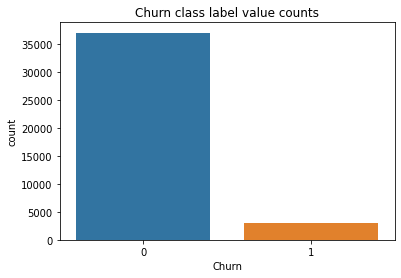

In [ ]:
plot_class_dist('Churn', y_train_churn)

Observation:
- Data w.r.t churn label is highly imbalanced.

####  Counting total NaNs for each feature

In [ ]:
print('Number of features which only have NaNs present: ',(X_train_churn.isna().sum() == X_train_churn.shape[0]).sum())

Number of features which only have NaNs present:  18


In [ ]:
all_nan_columns = np.array(X_train_churn.columns[X_train_churn.isna().sum() == X_train_churn.shape[0]])

In [ ]:
print('Number of features which do not countain NaNs:',(X_train_churn.notna().sum() == X_train_churn.shape[0]).sum())

Number of features which do not countain NaNs: 19


In [ ]:
not_nan_columns = np.array(X_train_churn.columns[X_train_churn.notna().sum() == X_train_churn.shape[0]])

In [ ]:
not_nan_columns

array(['Var57', 'Var73', 'Var113', 'Var193', 'Var195', 'Var196', 'Var198',
       'Var204', 'Var207', 'Var210', 'Var211', 'Var212', 'Var216',
       'Var220', 'Var221', 'Var222', 'Var226', 'Var227', 'Var228'],
      dtype=object)

In [ ]:
X_train_churn.dtypes[not_nan_columns]

Var57     float64
Var73       int64
Var113    float64
Var193     object
Var195     object
Var196     object
Var198     object
Var204     object
Var207     object
Var210     object
Var211     object
Var212     object
Var216     object
Var220     object
Var221     object
Var222     object
Var226     object
Var227     object
Var228     object
dtype: object

<b>Observation: </b>
    - Out of 19 columns which do not have any missing data, 3 are numerical and 16 are categorical.

In [ ]:
#https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
nan_count_array = []
for i in X_train_churn.columns:
    nan_count = X_train_churn[i].isna().sum()
    nan_count_array.append(nan_count)

In [ ]:
#to-do: tabular form 
x = PrettyTable()
x.add_column('Features', list(X_train_churn.columns))
x.add_column('Number of NaNs',nan_count_array)

In [ ]:
print(x)

+----------+----------------+
| Features | Number of NaNs |
+----------+----------------+
|   Var1   |     39436      |
|   Var2   |     38983      |
|   Var3   |     38983      |
|   Var4   |     38715      |
|   Var5   |     38790      |
|   Var6   |      4500      |
|   Var7   |      4493      |
|   Var8   |     40000      |
|   Var9   |     39436      |
|  Var10   |     38790      |
|  Var11   |     38983      |
|  Var12   |     39552      |
|  Var13   |      4493      |
|  Var14   |     38983      |
|  Var15   |     40000      |
|  Var16   |     38790      |
|  Var17   |     38715      |
|  Var18   |     38715      |
|  Var19   |     38715      |
|  Var20   |     40000      |
|  Var21   |      4500      |
|  Var22   |      4076      |
|  Var23   |     38790      |
|  Var24   |      5848      |
|  Var25   |      4076      |
|  Var26   |     38790      |
|  Var27   |     38790      |
|  Var28   |      4078      |
|  Var29   |     39436      |
|  Var30   |     39436      |
|  Var31  

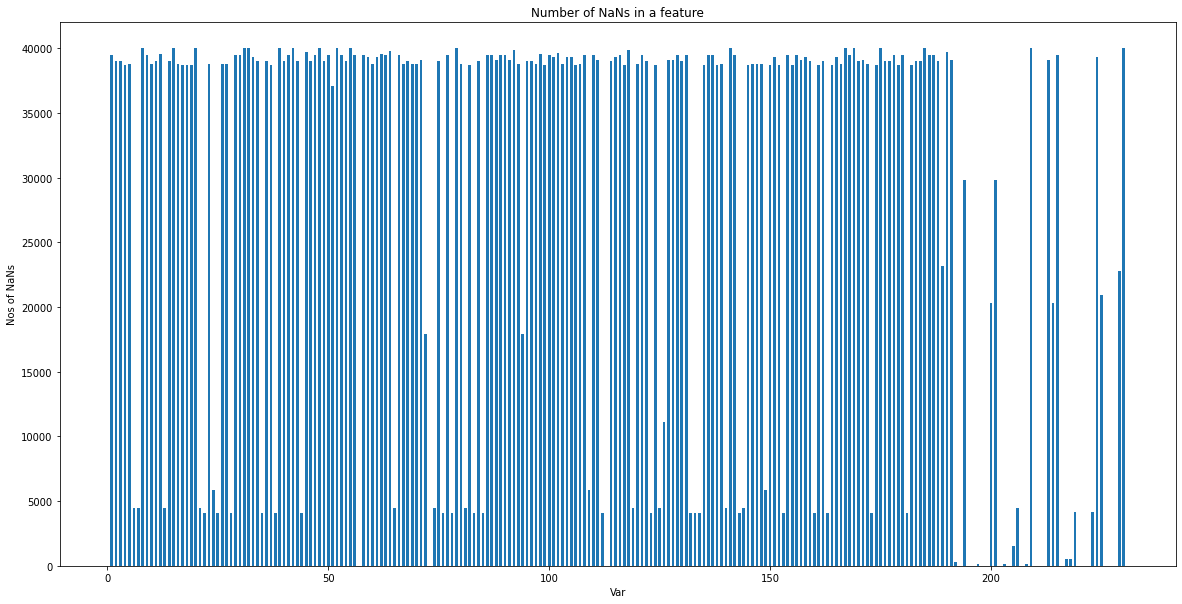

In [ ]:
fig = plt.figure(figsize = (20, 10))
plt.bar(range(1,X_train_churn.shape[1]+1), height = nan_count_array, width = 0.6,data = nan_count_array)
plt.xlabel('Var')
plt.ylabel('Nos of NaNs')
plt.title('Number of NaNs in a feature')
plt.show()

Observation:
- Most of the features have high count of NaNs (near to 50k)
- Few features have NaN count under 10k
- Only a handful of features (belonging to categorical) have low or none count of NaNs 
- There are 18 columns with only NaN value present

#### Unique value counts for Categorical features

- Categorical features ranges from Var191 to Var230 
- We'll see the the unique values that each feature holds. Based on the count, we'll decide which categorical encoding to choose.
- If the value count per feature is high, then choosing OHE will result in highly sparse and large vectors.

In [ ]:
X_train_churn.iloc[:,190:].head()

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
13282,NaN,oUPBcmzkzH,5QKIjwyXr4MCZTEp7uAkS8PtBLcn,SEuy,taul,1K8T,lK27,fhk21Ss,r83_sZi,Xuaegi4,smXZ,kk_f,9_Y1,yrDU,VpdQ,y6dw,7M47J5GA0pTYIFxg5uy,kIsH,NaN,uKAI,L84s,5u2Bxlj9ua90kqrA,NaN,44ysJIU,NaN,7WwtEtr,z5Ok,UYBR,qxDb,4UxGlow,JIiEFBU,catzS2D,jySVZNlOJy,NaN,xG3x,Qcbd,ZI9m,VjDE,mj86,NaN
44013,NaN,52Iq9ayE15,RO12,NaN,taul,1K8T,z32l,UsSOoyT,nQUq7hGe64,NaN,NaN,jrUy,9_Y1,vm5R,09_Q,IYzP,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJtVhC,9eg8,UYBR,FzaX,_Pu6s0w,oslk,Ha_79_c,LM8l689qOp,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,NaN
30999,NaN,a4vPe2fHUn,2Knk1KF,SEuy,taul,1K8T,TyGl,THRJJYr,r83_sZi,Sc4mZtf,smXZ,sOYL,9_Y1,mTeA,VpdQ,hAFG,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,ma2VgRD,NaN,_JdcICD,upnW,UYBR,FzaX,Nr9Y_02,oslk,afdTzYj,LM8l689qOp,NaN,kG3k,FSa2,RAYp,TCU50_Yjmm6GIBZ0lL_,mj86,NaN
7521,NaN,EsYq9aX0Db,RO12,NaN,taul,1K8T,L80O,8K14q6X,PaagavI,NaN,NaN,9n6A,9_Y1,Y9Bl,sJzTlal,IYzP,me75fM6ugJ,kIsH,NaN,uKAI,Mtgm,NhsEn4L,NaN,NaN,NaN,mAjbk_S,_fR4,cJvF,OFWH,HrlK5YS,oslk,fs3nhll,LM8l689qOp,NaN,NaN,uWr3,RAYp,F2FyR07IdsN7I,NaN,NaN
17794,NaN,1YVvyx7IEC,RO12,NaN,taul,1K8T,FgS1,oKsWccX,Gai9lEF2Fr,NaN,NaN,lb2I,9_Y1,RcM7,09_Q,NaN,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,eGzu,mAja5EA,WGwm,UYBR,FzaX,_Px1UQz,oslk,35dYyXX,LM8l689qOp,NaN,NaN,szEZ,RAYp,F2FyR07IdsN7I,NaN,NaN


In [ ]:
X_train_churn.iloc[:,190:].nunique(axis = 0,dropna = False)

Var191        2
Var192      357
Var193       51
Var194        4
Var195       22
Var196        4
Var197      218
Var198     3844
Var199     4395
Var200    13338
Var201        3
Var202     5561
Var203        6
Var204      100
Var205        4
Var206       22
Var207       14
Var208        3
Var209        1
Var210        6
Var211        2
Var212       77
Var213        2
Var214    13338
Var215        2
Var216     1838
Var217    12479
Var218        3
Var219       23
Var220     3844
Var221        7
Var222     3844
Var223        5
Var224        2
Var225        4
Var226       23
Var227        7
Var228       30
Var229        5
Var230        1
dtype: int64

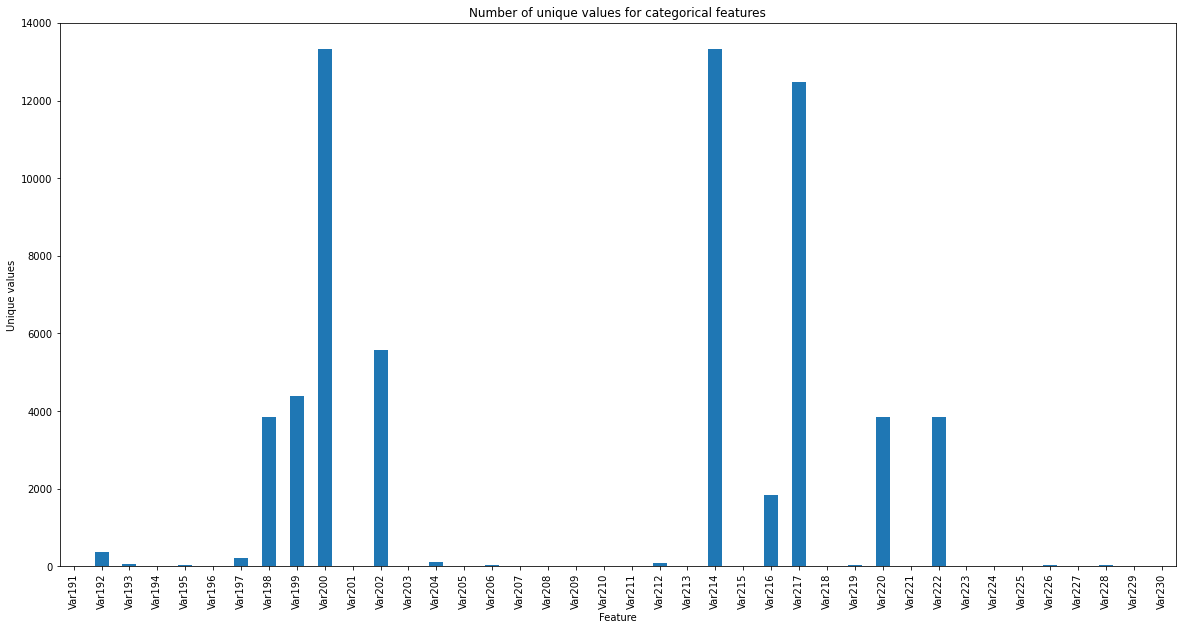

In [ ]:
#https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/
fig = plt.figure(figsize = (20, 10))
X_train_churn.iloc[:,190:].nunique(axis = 0,dropna = False).plot(kind = 'bar')
plt.title('Number of unique values for categorical features')
plt.xlabel('Feature')
plt.ylabel('Unique values')
plt.show()

##### Observation:
- 20 out of 40 feature have unique value count under 10.
- 9 features have unique value count which spans in range of 1000s

<strike>Although half of the categorical features have unique value count under 10, the other half has unique value counts in 1000s. It'll not be wise to apply OHE here as it'll create sparse vector having len in 1000s</strike> <font color = 'red'>The encoding method depends on the algorithm under consideration. For instance, LR works pretty well with high dimentional data. OHE could give a good score in this case. But the same might not be suitable for algorithms that are affected by curse of dimensionality like KNN. Also, it might not work well on tree based models.</font>

#### Numerical range for class label

Since the number of numerical features are 190, we'll only look into range of few features.

We are only looking into features Var21 to Var25

In [ ]:
X_train_churn.iloc[:,20:30].head()

,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30
13282,596.0,745.0,NaN,10.0,272.0,NaN,NaN,186.64,NaN,NaN
44013,140.0,175.0,NaN,0.0,8.0,NaN,NaN,321.60,NaN,NaN
30999,120.0,150.0,NaN,4.0,88.0,NaN,NaN,186.64,NaN,NaN
7521,536.0,670.0,NaN,20.0,192.0,NaN,NaN,213.36,NaN,NaN
17794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.0


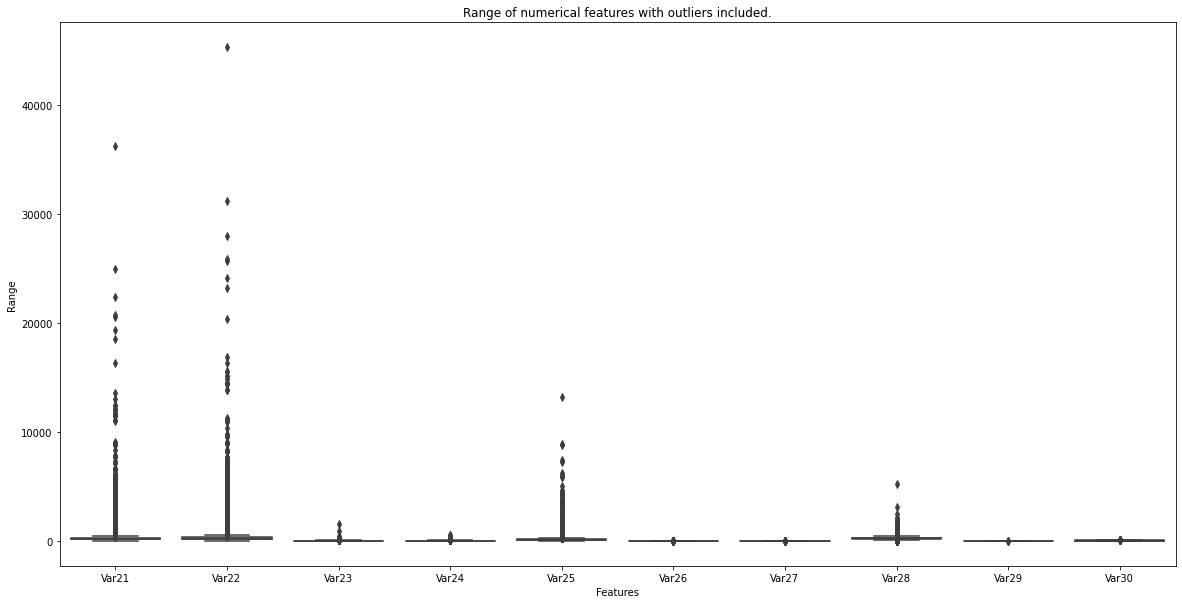

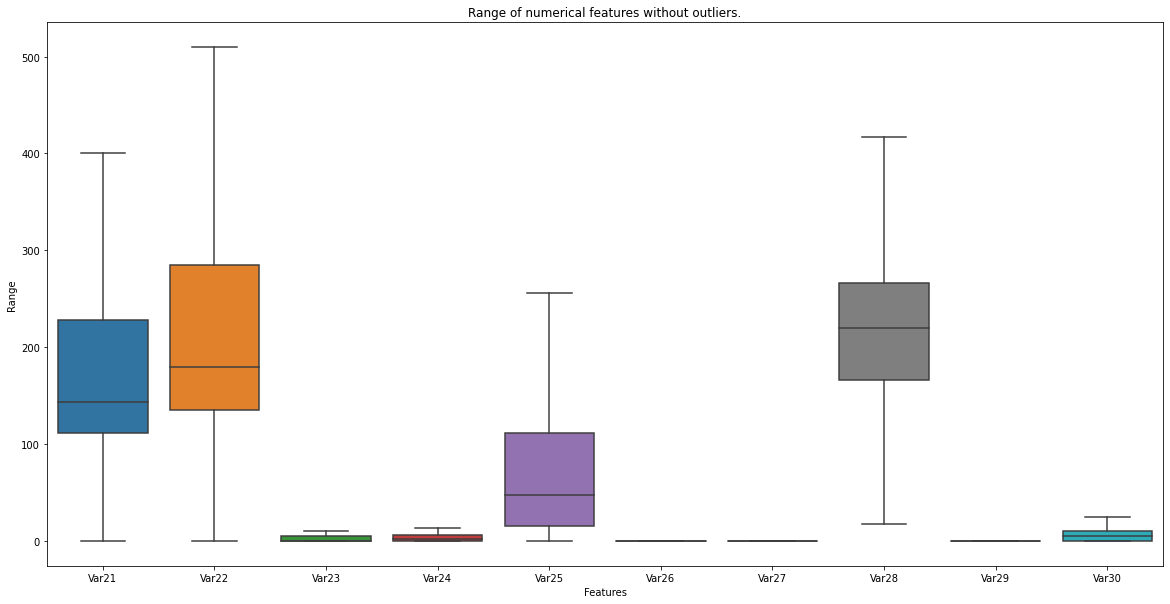

In [ ]:
# https://www.mikulskibartosz.name/how-to-remove-outliers-from-seaborn-boxplot-charts/
fig = plt.figure(figsize = (20, 10))
sns.boxplot(data = X_train_churn.iloc[:,20:30])
plt.title('Range of numerical features with outliers included.')
plt.xlabel('Features')
plt.ylabel('Range')
plt.show()
fig = plt.figure(figsize = (20, 10))
sns.boxplot(data = X_train_churn.iloc[:,20:30],showfliers = False)
plt.title('Range of numerical features without outliers.')
plt.xlabel('Features')
plt.ylabel('Range')
plt.show()

##### Observation:
- All features have different range.
- Var23 and Var24 have similar range.

<hr>

#### Checking for pattern in missing values

In [ ]:
#https://towardsdatascience.com/missing-data-cfd9dbfd11b7
#https://towardsdatascience.com/all-about-missing-data-handling-b94b8b5d2184
#https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009
#https://github.com/ResidentMario/missingno

##### We'll check whether the NaNs value occur w.r.t a specific class or not

In [ ]:
data_with_labels = pd.concat([X_train_churn,y_train_churn],axis = 1)

In [ ]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
#https://stackoverflow.com/questions/39454542/divide-two-dataframes-with-python
# Percentage of NaNs w.r.t class
data_with_labels.isna().groupby(data_with_labels.Churn).sum().div(data_with_labels.Churn.value_counts(),axis = 0) * 100

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Churn
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,98.567266,97.382764,97.382764,96.686633,96.883600,11.545518,11.502347,100.0,98.567266,96.883600,97.382764,98.864066,11.502347,97.382764,100.0,96.883600,96.686633,96.686633,96.686633,100.0,11.545518,10.479737,96.883600,14.729372,10.479737,96.883600,96.883600,10.485133,98.567266,98.567266,100.0,100.0,98.205709,97.382764,10.479737,97.382764,96.686633,10.479737,100.0,97.382764,...,0.652960,0.0,74.275538,0.0,0.0,0.296800,0.0,0.008095,50.051265,74.278236,0.002698,0.296800,0.0,3.853003,11.545518,0.0,0.296800,100.0,0.0,0.0,0.0,97.628299,50.051265,98.583455,0.0,1.127840,1.127840,10.377206,0.0,0.0,0.0,10.377206,98.27856,51.556851,0.0,0.0,0.0,56.011548,100.0,0.0
1,98.876787,98.400272,98.400272,98.059905,98.127978,7.522124,7.828455,100.0,98.876787,98.127978,98.400272,99.081007,7.828455,98.400272,100.0,98.127978,98.059905,98.059905,98.059905,100.0,7.522124,6.535058,98.127978,13.240300,6.535058,98.127978,98.127978,6.535058,98.876787,98.876787,100.0,100.0,98.842750,98.400272,6.535058,98.400272,98.059905,6.535058,100.0,98.400272,...,1.599728,0.0,77.399592,0.0,0.0,0.136147,0.0,0.034037,59.768550,77.399592,0.000000,0.136147,0.0,4.322668,7.522124,0.0,0.136147,100.0,0.0,0.0,0.0,98.502383,59.768550,98.876787,0.0,4.969367,4.969367,11.130020,0.0,0.0,0.0,11.130020,98.63853,61.232131,0.0,0.0,0.0,67.460858,100.0,0.0


##### Observation: 
- NaN value doesn't occur for specific class.
- Percetage of NaN is uniform across classe. 

#### Dropping columns with only NaNs value present

In [ ]:
temp_data = X_train_churn.drop(columns = all_nan_columns)

In [ ]:
#temp_data = temp_data.drop(columns = not_nan_columns)

In [ ]:
temp_data.shape

(40000, 212)

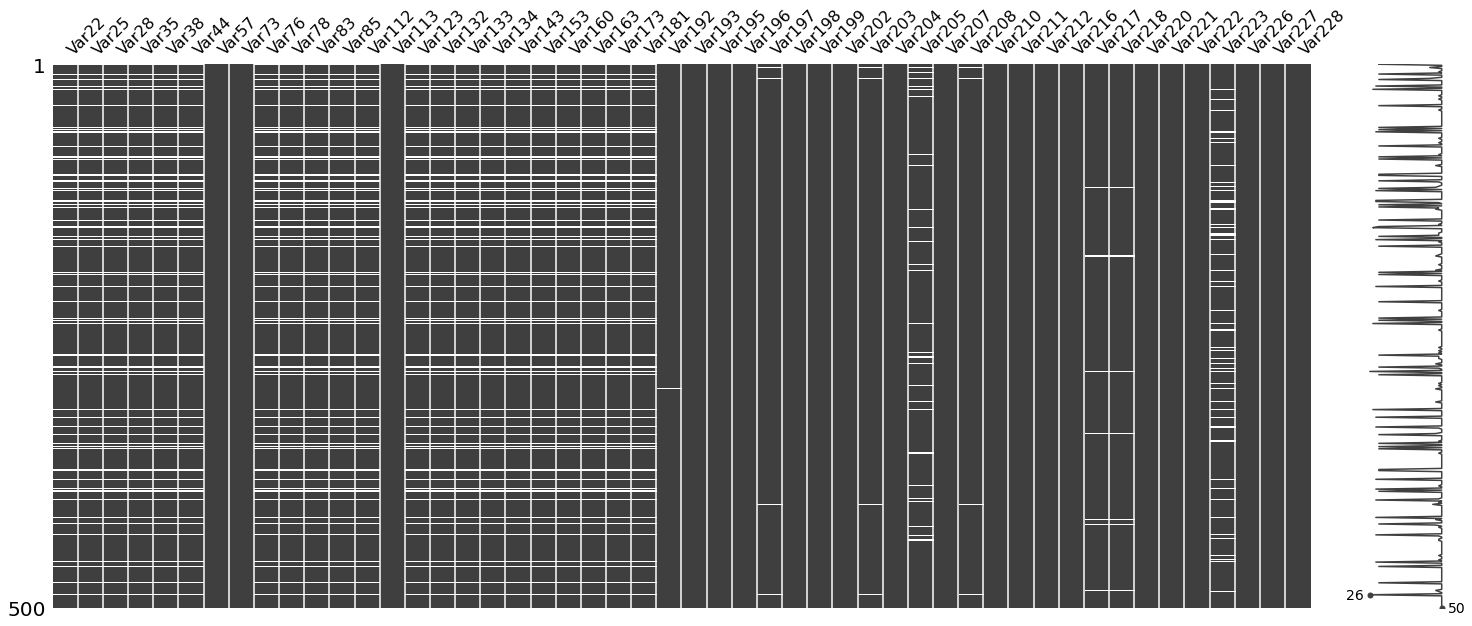

In [ ]:
filter_data = msno.nullity_filter(temp_data, filter='top',n = 50)
msno.matrix(filter_data.sample(500))
plt.show()

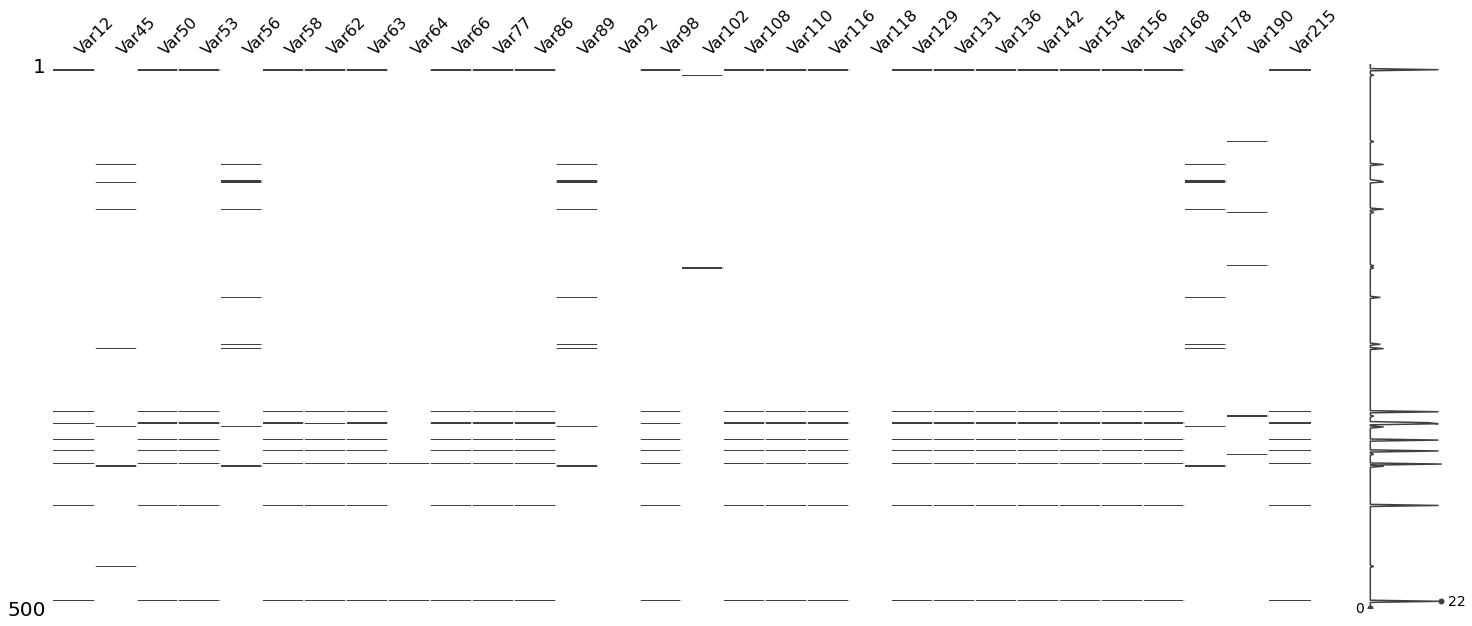

In [ ]:
filter_data = msno.nullity_filter(temp_data, filter='bottom',n = 30)
msno.matrix(filter_data.sample(500))
plt.show()

The white lines in above figure represent missing data.

Observation:
- You can see there is a patten of missingness of values. 

<hr>

#### Checking for the correlation of missingness

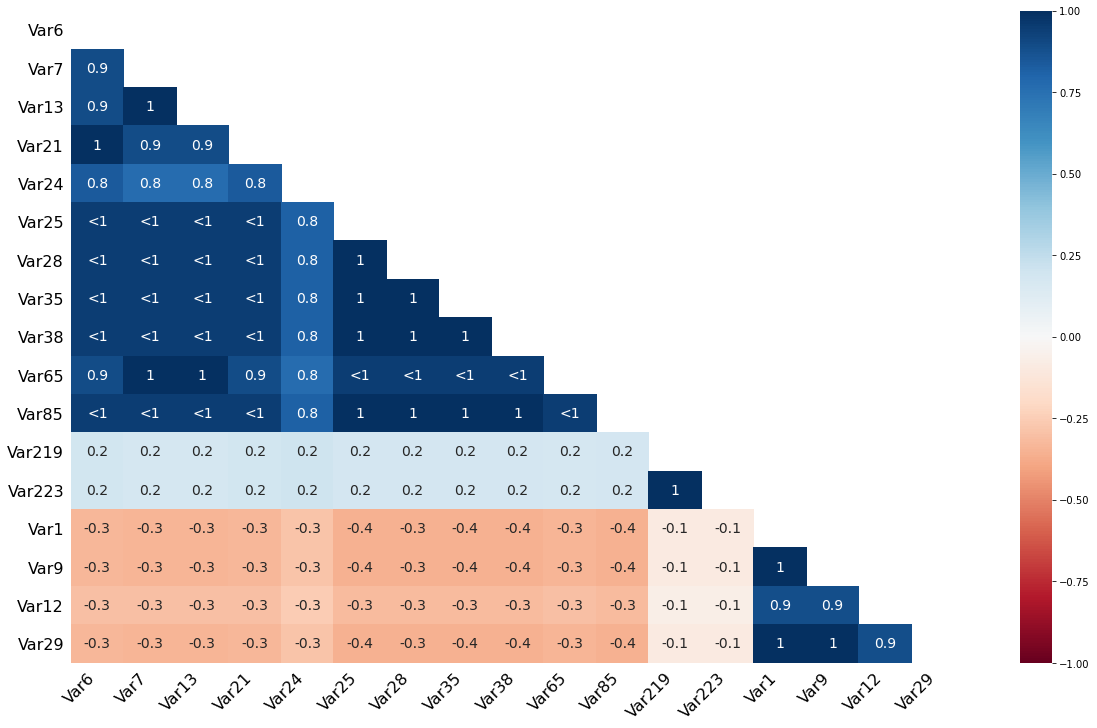

In [ ]:
msno.heatmap(temp_data[['Var6','Var7','Var13','Var21','Var24','Var25','Var28','Var35','Var38','Var65','Var85','Var219','Var223','Var1','Var9','Var12','Var29']])

We took a handful of features to check whether there is a correlation in missingness of values.

- Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Observation:
- Most of the features we checked have value 1 meaning there is a correlation in missingness

Conclusion:
- As there is a correlation in missingness, we can rule out Missing Completely at random.

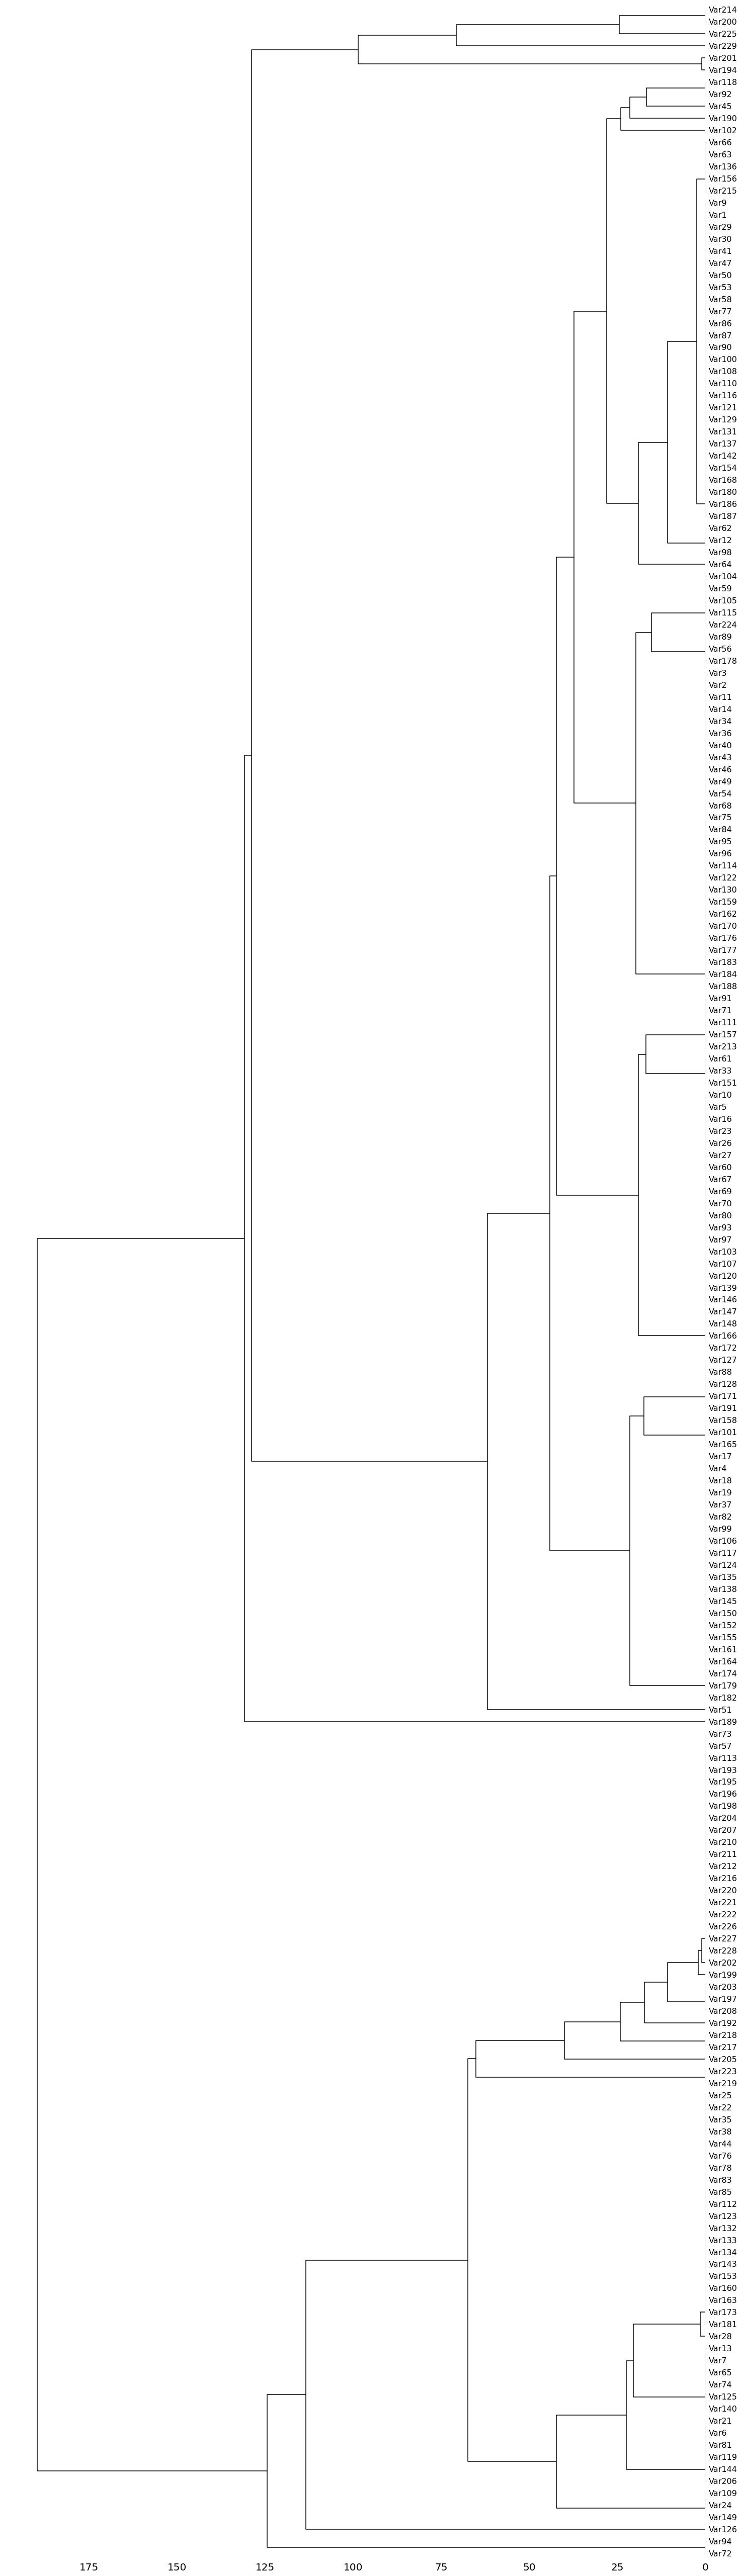

In [ ]:
msno.dendrogram(temp_data)

Observation:
- Variable value which are linked together at 0 fully predict one another's presence i.e one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on.
- There are lot of variable which are linked at 0 distance.

- You can see from the matrix above that in a feature group there is a pattern of missingness

##### <font color= "red"> Query:  how to conclude whether it is MAR (Missing at random) or MNAR(Missing not at random)?

https://www.youtube.com/watch?v=YpqUbirqFxQ

https://www.youtube.com/watch?v=ACN29i_fqkk

https://www.youtube.com/watch?v=asyJCVLV4LI



<b>To check if the missing data depends on the observed data (MAR), we'll put sub sample of missing data columns against sample of categorical columns with no missing data and see if data is missing for specific categorical value.

In [ ]:
missing_data_cols = ['Var123','Var132','Var133','Var143','Var153','Var160','Var163','Var173','Var181']
#cat_cols = ['Var192','Var193','Var195','Var196','Var197','Var198','Var199','Var202','Var203','Var204']

In [ ]:
cat_not_nan_cols = not_nan_columns[3:]

In [ ]:
num_not_nan = not_nan_columns[:3]

In [ ]:
all_cols = missing_data_cols + list(cat_not_nan_cols)

In [ ]:
missing_data = X_train_churn[all_cols]

In [ ]:
missing_data.head()

,Var123,Var132,Var133,Var143,Var153,Var160,Var163,Var173,Var181,Var193,Var195,Var196,Var198,Var204,Var207,Var210,Var211,Var212,Var216,Var220,Var221,Var222,Var226,Var227,Var228
13282,60.0,0.0,365835.0,0.0,649576.0,144.0,221724.0,0.0,0.0,5QKIjwyXr4MCZTEp7uAkS8PtBLcn,taul,1K8T,fhk21Ss,yrDU,7M47J5GA0pTYIFxg5uy,uKAI,L84s,5u2Bxlj9ua90kqrA,7WwtEtr,4UxGlow,JIiEFBU,catzS2D,Qcbd,ZI9m,VjDE
44013,6.0,0.0,9245550.0,0.0,10672480.0,48.0,0.0,0.0,0.0,RO12,taul,1K8T,UsSOoyT,vm5R,me75fM6ugJ,uKAI,L84s,NhsEn4L,kZJtVhC,_Pu6s0w,oslk,Ha_79_c,7P5s,RAYp,F2FyR07IdsN7I
30999,0.0,0.0,4634955.0,0.0,10274360.0,22.0,2073600.0,0.0,0.0,2Knk1KF,taul,1K8T,THRJJYr,mTeA,me75fM6ugJ,uKAI,L84s,XfqtO3UdzaXh_,_JdcICD,Nr9Y_02,oslk,afdTzYj,FSa2,RAYp,TCU50_Yjmm6GIBZ0lL_
7521,6.0,0.0,262870.0,0.0,480408.0,68.0,110844.0,0.0,0.0,RO12,taul,1K8T,8K14q6X,Y9Bl,me75fM6ugJ,uKAI,Mtgm,NhsEn4L,mAjbk_S,HrlK5YS,oslk,fs3nhll,uWr3,RAYp,F2FyR07IdsN7I
17794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RO12,taul,1K8T,oKsWccX,RcM7,me75fM6ugJ,uKAI,L84s,NhsEn4L,mAja5EA,_Px1UQz,oslk,35dYyXX,szEZ,RAYp,F2FyR07IdsN7I


In [ ]:
missing_data.isna().any(axis = 1)

13282    False
44013    False
30999    False
7521     False
17794     True
         ...  
34956    False
5456     False
37401    False
32888    False
317      False
Length: 40000, dtype: bool

In [ ]:
#https://stackoverflow.com/questions/14247586/how-to-select-rows-with-one-or-more-nulls-from-a-pandas-dataframe-without-listin
missing_data[missing_data.isna().any(axis = 1)][cat_not_nan_cols].nunique()

Var193       6
Var195       7
Var196       3
Var198    1127
Var204     100
Var207       6
Var210       5
Var211       2
Var212      16
Var216     155
Var220    1127
Var221       7
Var222    1127
Var226      23
Var227       7
Var228      10
dtype: int64

<b> Checking for relation of missingness with numerical data

In [ ]:
num_not_nan

array(['Var57', 'Var73', 'Var113'], dtype=object)

In [ ]:
all_cols = missing_data_cols + list(num_not_nan)

In [ ]:
missing_data = X_train_churn[all_cols]

In [ ]:
missing_data.head()

,Var123,Var132,Var133,Var143,Var153,Var160,Var163,Var173,Var181,Var57,Var73,Var113
13282,60.0,0.0,365835.0,0.0,649576.0,144.0,221724.0,0.0,0.0,5.802820,214,-38241.44
44013,6.0,0.0,9245550.0,0.0,10672480.0,48.0,0.0,0.0,0.0,5.040376,28,210249.60
30999,0.0,0.0,4634955.0,0.0,10274360.0,22.0,2073600.0,0.0,0.0,5.946806,170,123881.20
7521,6.0,0.0,262870.0,0.0,480408.0,68.0,110844.0,0.0,0.0,0.411237,34,-1417852.00
17794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.357830,4,-2951636.00


<b> Dropping all nan

In [ ]:
non_missing_data = missing_data.dropna()

<b> Checking min and max

In [ ]:
non_missing_data.min()

Var123    0.000000e+00
Var132    0.000000e+00
Var133    0.000000e+00
Var143    0.000000e+00
Var153    0.000000e+00
Var160    0.000000e+00
Var163    0.000000e+00
Var173    0.000000e+00
Var181    0.000000e+00
Var57     2.136296e-04
Var73     1.200000e+01
Var113   -9.803600e+06
dtype: float64

In [ ]:
non_missing_data.max()

Var123       13086.0
Var132         184.0
Var133    15009900.0
Var143          18.0
Var153    13757200.0
Var160        4862.0
Var163    14515200.0
Var173           6.0
Var181          49.0
Var57            7.0
Var73          264.0
Var113     9932480.0
dtype: float64

<b> Only keeping nan data and then checking min and max of numerical var 

In [ ]:
missing = missing_data[missing_data.isna().any(axis =1)].iloc[:,-3:]

In [ ]:
missing_data[missing_data.isna().any(axis =1)].min()

Var123             NaN
Var132             NaN
Var133             NaN
Var143             NaN
Var153             NaN
Var160             NaN
Var163             NaN
Var173             NaN
Var181             NaN
Var57     3.204443e-03
Var73     4.000000e+00
Var113   -9.684120e+06
dtype: float64

In [ ]:
missing_data[missing_data.isna().any(axis =1)].max()

Var123          NaN
Var132          NaN
Var133          NaN
Var143          NaN
Var153          NaN
Var160          NaN
Var163          NaN
Var173          NaN
Var181          NaN
Var57           7.0
Var73          10.0
Var113    6239680.0
dtype: float64

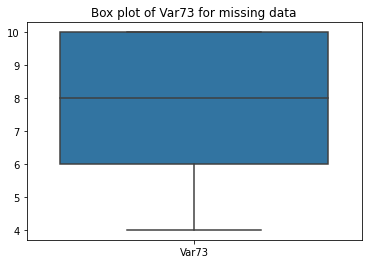

In [ ]:
sns.boxplot(data = missing[['Var73']])
plt.title('Box plot of Var73 for missing data')
plt.show()

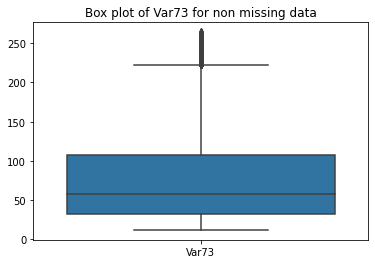

In [ ]:
sns.boxplot(data = non_missing_data[['Var73']])
plt.title('Box plot of Var73 for non missing data')
plt.show()

Observation:
- For var73, if you look closely for non missing min and max, it is 12 and 264 resp. However max for missing data is 10.
 
We can say that for the data missing the value of Var73 end at 10 but for data present value of Var73 starts at 12.
This may be one of many other cases present in dataset.
 
 Since there is pattern in missingness and a missingness depends on observed data and we can assume that this is<b> Missing at Random (MAR).

Now that we have concluded that data is Missing at Random (MAR), we can either remove the NaN data or we can use imputation.

For removing data, we have:
- Listwise deletion : Removes all data from an observation that has one or more missing values. Produces bias
- Pairwise deletion : Used in MCAR.
- Dropping variable : Dropping variables with having missing values % greater than 60%

We'll be dropping variables followed by imputation.

Reference : https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

### <hr> Handling NaNs

As we can see from the graph above, most of features have NaN values reaching close to 40k out of 40k datapoints. In order to handle that, we'll be removing features in which NaN value exceeds the threshold.
We'll check for 50,60, 70, 80 percent for threshold value.

In [ ]:
nan_count_array = np.asarray(nan_count_array)

In [ ]:
print('Number of features which have NaN count less than 50 perc of original data: ',(nan_count_array < .5*X_train_churn.shape[0]).sum())

Number of features which have NaN count less than 50 perc of original data:  69


In [ ]:
print('Number of features which have NaN count less than 60 perc of original data: ',(nan_count_array < .6*X_train_churn.shape[0]).sum())

Number of features which have NaN count less than 60 perc of original data:  74


In [ ]:
print('Number of features which have NaN count less than 70 perc of original data: ',(nan_count_array < .7*X_train_churn.shape[0]).sum())

Number of features which have NaN count less than 70 perc of original data:  74


In [ ]:
print('Number of features which have NaN count less than 80 perc of original data: ',(nan_count_array < .8*X_train_churn.shape[0]).sum())

Number of features which have NaN count less than 80 perc of original data:  76


Observation:
- When threshold is set at 50 perc, only 69 features have NaN count less than 50% of total data.
- For both 60 and 70 value of threshold, number of features remains same at 74.
- When threshold is set at 80% , number of features that satify the condition are 76. An increase of two feature from last observation.

We'll continue with 60% threshold and remove features which have NaN count more than 60%

In [ ]:
features = np.argwhere(nan_count_array < .6*X_train_churn.shape[0])

In [ ]:
features = features.flatten()

In [ ]:
features

array([  5,   6,  12,  20,  21,  23,  24,  27,  34,  37,  43,  56,  64,
        71,  72,  73,  75,  77,  80,  82,  84,  93, 108, 111, 112, 118,
       122, 124, 125, 131, 132, 133, 139, 142, 143, 148, 152, 159, 162,
       172, 180, 188, 191, 192, 194, 195, 196, 197, 198, 199, 201, 202,
       203, 204, 205, 206, 207, 209, 210, 211, 213, 215, 216, 217, 218,
       219, 220, 221, 222, 224, 225, 226, 227, 228])

In [ ]:
data_new = X_train_churn.iloc[:,features]
data_new_test = X_test_churn.iloc[:, features]

In [ ]:
X_test_churn = X_test_churn.iloc[:, features]

In [ ]:
data_new.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
13282,3458.0,7.0,2528.0,596.0,745.0,10.0,272.0,186.64,0.0,25536.0,0.0,5.802820,18.0,3.0,214,7.0,187616.0,0.0,3434.82,15.0,20.0,217311.0,144.0,160.0,-38241.44,1480.0,60.0,15480.0,NaN,0.0,365835.0,48138.0,4830.0,0.0,18.0,25130.0,649576.0,144.0,221724.0,0.0,0.0,390.0,oUPBcmzkzH,5QKIjwyXr4MCZTEp7uAkS8PtBLcn,taul,1K8T,lK27,fhk21Ss,r83_sZi,Xuaegi4,kk_f,9_Y1,yrDU,VpdQ,y6dw,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,5u2Bxlj9ua90kqrA,44ysJIU,7WwtEtr,z5Ok,UYBR,qxDb,4UxGlow,JIiEFBU,catzS2D,jySVZNlOJy,xG3x,Qcbd,ZI9m,VjDE,mj86
44013,616.0,0.0,0.0,140.0,175.0,0.0,8.0,321.60,0.0,199926.0,0.0,5.040376,9.0,3.0,28,0.0,6220800.0,0.0,119798.70,0.0,0.0,35172.0,32.0,72.0,210249.60,565.0,6.0,0.0,NaN,0.0,9245550.0,16194.0,0.0,0.0,18.0,0.0,10672480.0,48.0,0.0,0.0,0.0,348.0,52Iq9ayE15,RO12,taul,1K8T,z32l,UsSOoyT,nQUq7hGe64,NaN,jrUy,9_Y1,vm5R,09_Q,IYzP,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,kZJtVhC,9eg8,UYBR,FzaX,_Pu6s0w,oslk,Ha_79_c,LM8l689qOp,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN
30999,777.0,14.0,428.0,120.0,150.0,4.0,88.0,186.64,0.0,0.0,0.0,5.946806,36.0,12.0,170,21.0,2764800.0,0.0,234931.50,0.0,8.0,388527.0,32.0,32.0,123881.20,480.0,0.0,34722.0,12.0,0.0,4634955.0,1900800.0,5530.0,0.0,27.0,1209600.0,10274360.0,22.0,2073600.0,0.0,0.0,NaN,a4vPe2fHUn,2Knk1KF,taul,1K8T,TyGl,THRJJYr,r83_sZi,Sc4mZtf,sOYL,9_Y1,mTeA,VpdQ,hAFG,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,ma2VgRD,_JdcICD,upnW,UYBR,FzaX,Nr9Y_02,oslk,afdTzYj,LM8l689qOp,kG3k,FSa2,RAYp,TCU50_Yjmm6GIBZ0lL_,mj86
7521,3416.0,7.0,124.0,536.0,670.0,20.0,192.0,213.36,0.0,1062.0,0.0,0.411237,9.0,3.0,34,35.0,237296.0,0.0,6929.43,0.0,54.0,4020.0,256.0,384.0,-1417852.00,1525.0,6.0,189.0,-26.0,0.0,262870.0,38430.0,150.0,0.0,9.0,78869.0,480408.0,68.0,110844.0,0.0,0.0,NaN,EsYq9aX0Db,RO12,taul,1K8T,L80O,8K14q6X,PaagavI,NaN,9n6A,9_Y1,Y9Bl,sJzTlal,IYzP,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,NaN,mAjbk_S,_fR4,cJvF,OFWH,HrlK5YS,oslk,fs3nhll,LM8l689qOp,NaN,uWr3,RAYp,F2FyR07IdsN7I,NaN
17794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.357830,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2951636.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,1YVvyx7IEC,RO12,taul,1K8T,FgS1,oKsWccX,Gai9lEF2Fr,NaN,lb2I,9_Y1,RcM7,09_Q,NaN,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,mAja5EA,WGwm,UYBR,FzaX,_Px1UQz,oslk,35dYyXX,LM8l689qOp,NaN,szEZ,RAYp,F2FyR07IdsN7I,NaN


In [ ]:
data_new_test.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
24242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.429609,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2242172.00,NaN,NaN,NaN,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zcRZptzip9,RO12,taul,1K8T,487l,kjvBmIU,_UtlxbJ,NaN,0xiW,9_Y1,t_4G,VpdQ,NaN,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,NaN,mAj3FSW,U56I,UYBR,FzaX,1vNmS85,oslk,MkQldxq,LM8l689qOp,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN
9248,1554.0,14.0,468.0,160.0,200.0,10.0,48.0,186.64,0.0,4002636.0,0.0,4.268105,18.0,6.0,152,14.0,2457712.0,0.0,81303.59,0.0,14.0,187728.0,80.0,32.0,-75197.20,950.0,72.0,2268.0,4.0,0.0,5222150.0,74150.0,1130.0,0.0,36.0,224035.0,8336480.0,22.0,169740.0,0.0,0.0,NaN,zcROj17IEC,2Knk1KF,taul,1K8T,aD1X,fhk21Ss,sLarhXg,z0C6Wov,vpM0,9_Y1,zfpA,VpdQ,wMei,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,E1aAZ0x7vd,omai8VY,CWNBi3w,S405,cJvF,FzaX,4UxGlow,QKW8DRm,catzS2D,LM8l689qOp,ELof,7aLG,ZI9m,ib5G6X1eUxUn6,mj86
16049,455.0,0.0,0.0,132.0,165.0,0.0,104.0,153.20,10.0,2356602.0,18.0,6.255074,9.0,3.0,26,0.0,1470024.0,3.0,219249.60,15.0,6.0,36375.0,40.0,32.0,16907.44,540.0,30.0,0.0,4.0,40.0,1778395.0,2068900.0,0.0,0.0,9.0,0.0,9712680.0,10.0,1555200.0,0.0,0.0,NaN,4e7gUH7IEC,RO12,taul,1K8T,vSNn,jCepSrJ,NW71mrodGH,NaN,BGAR,9_Y1,m_h1,VpdQ,zm5i,me75fM6ugJ,sBgB,uKAI,L84s,NhsEn4L,NaN,kZJtVhC,8JTE,UYBR,FzaX,Oy_RPEi,oslk,FS4qjNq,LM8l689qOp,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN
36719,812.0,7.0,3820.0,144.0,180.0,8.0,160.0,186.64,0.0,0.0,0.0,3.068148,9.0,3.0,152,1876.0,687296.0,3.0,173838.60,0.0,10.0,309.0,40.0,32.0,82540.40,570.0,0.0,46557.0,38.0,8.0,782385.0,543594.0,670.0,0.0,27.0,505988.0,2338564.0,14.0,422730.0,0.0,0.0,NaN,4e7Wq69R_D,2Knk1KF,taul,1K8T,ssAy,fhk21Ss,7ruKm4v,nDzuNGW,294_,9_Y1,Px52,VpdQ,itlM,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,Ie_5MZs,M_FmDrS,CWNY2py,PzVn,UYBR,FzaX,4UxGlow,zCkv,catzS2D,jySVZNlOJy,ELof,PM2D,ZI9m,TCU50_Yjmm6GIBZ0lL_,mj86
48490,721.0,7.0,1996.0,24.0,30.0,0.0,0.0,253.52,0.0,3441234.0,0.0,3.869259,9.0,NaN,106,91.0,0.0,0.0,242782.50,0.0,0.0,NaN,0.0,0.0,127975.60,390.0,6.0,37647.0,-18.0,0.0,10109000.0,0.0,515.0,0.0,36.0,0.0,10381360.0,10.0,0.0,0.0,0.0,300.0,GcUBcmz45j,2Knk1KF,taul,1K8T,0WHw,xziqMKD,aXPHXVS,trdQ74g,kTCl,9_Y1,KubS,09_Q,hAFG,me75fM6ugJ,kIsH,uKAI,Mtgm,XfqtO3UdzaXh_,K75UFCy,XTbPUYD,uonk,UYBR,FzaX,KX868SY,oslk,Mkb2C8o,LM8l689qOp,kG3k,Qcbd,RAYp,55YFVY9,NaN


In [ ]:
#https://www.kaggle.com/questions-and-answers/181332
#http://shakedzy.xyz/dython/modules/nominal/#associations

# nominal.associations(data_new,figsize=(50,50), num_num_assoc= 'spearman',cmap = 'GnBu',mark_columns=True);

Observation:
- There are instances where a feature is highly correlated to other features. e.g : for Var21 has a correlation coef of 1 with Var22.

##### <font color = 'red'> Query: Should we remove the highly correlated feature? i.e having corr > 0.8
    
This answer to this depends on factors like type of algorithm your are considering, interpretability of your results, etc.

Go through this thread once: https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

Depending on the various experiment settings you create, treat the collinear features accordingly

We'll not be removing collinear features as having collinear features may or may not improve model performance but it will not degrade its performance. Also, they may be chance that new features based on these collinear features may add some new information to the model.

<hr>

#### Feature Groups

##### Plotting means of the features

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 13282 to 317
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    35500 non-null  float64
 1   Var7    35507 non-null  float64
 2   Var13   35507 non-null  float64
 3   Var21   35500 non-null  float64
 4   Var22   35924 non-null  float64
 5   Var24   34152 non-null  float64
 6   Var25   35924 non-null  float64
 7   Var28   35922 non-null  float64
 8   Var35   35924 non-null  float64
 9   Var38   35924 non-null  float64
 10  Var44   35924 non-null  float64
 11  Var57   40000 non-null  float64
 12  Var65   35507 non-null  float64
 13  Var72   22069 non-null  float64
 14  Var73   40000 non-null  int64  
 15  Var74   35507 non-null  float64
 16  Var76   35924 non-null  float64
 17  Var78   35924 non-null  float64
 18  Var81   35500 non-null  float64
 19  Var83   35924 non-null  float64
 20  Var85   35924 non-null  float64
 21  Var94   22069 non-null  float64
 

In [ ]:
numerical_data = data_new.iloc[:,0:42]
numerical_data_test = data_new_test.iloc[:,:42]

In [ ]:
numerical_data.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189
13282,3458.0,7.0,2528.0,596.0,745.0,10.0,272.0,186.64,0.0,25536.0,0.0,5.802820,18.0,3.0,214,7.0,187616.0,0.0,3434.82,15.0,20.0,217311.0,144.0,160.0,-38241.44,1480.0,60.0,15480.0,NaN,0.0,365835.0,48138.0,4830.0,0.0,18.0,25130.0,649576.0,144.0,221724.0,0.0,0.0,390.0
44013,616.0,0.0,0.0,140.0,175.0,0.0,8.0,321.60,0.0,199926.0,0.0,5.040376,9.0,3.0,28,0.0,6220800.0,0.0,119798.70,0.0,0.0,35172.0,32.0,72.0,210249.60,565.0,6.0,0.0,NaN,0.0,9245550.0,16194.0,0.0,0.0,18.0,0.0,10672480.0,48.0,0.0,0.0,0.0,348.0
30999,777.0,14.0,428.0,120.0,150.0,4.0,88.0,186.64,0.0,0.0,0.0,5.946806,36.0,12.0,170,21.0,2764800.0,0.0,234931.50,0.0,8.0,388527.0,32.0,32.0,123881.20,480.0,0.0,34722.0,12.0,0.0,4634955.0,1900800.0,5530.0,0.0,27.0,1209600.0,10274360.0,22.0,2073600.0,0.0,0.0,NaN
7521,3416.0,7.0,124.0,536.0,670.0,20.0,192.0,213.36,0.0,1062.0,0.0,0.411237,9.0,3.0,34,35.0,237296.0,0.0,6929.43,0.0,54.0,4020.0,256.0,384.0,-1417852.00,1525.0,6.0,189.0,-26.0,0.0,262870.0,38430.0,150.0,0.0,9.0,78869.0,480408.0,68.0,110844.0,0.0,0.0,NaN
17794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.357830,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2951636.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0


In [ ]:
numerical_data_test.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189
24242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.429609,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2242172.00,NaN,NaN,NaN,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9248,1554.0,14.0,468.0,160.0,200.0,10.0,48.0,186.64,0.0,4002636.0,0.0,4.268105,18.0,6.0,152,14.0,2457712.0,0.0,81303.59,0.0,14.0,187728.0,80.0,32.0,-75197.20,950.0,72.0,2268.0,4.0,0.0,5222150.0,74150.0,1130.0,0.0,36.0,224035.0,8336480.0,22.0,169740.0,0.0,0.0,NaN
16049,455.0,0.0,0.0,132.0,165.0,0.0,104.0,153.20,10.0,2356602.0,18.0,6.255074,9.0,3.0,26,0.0,1470024.0,3.0,219249.60,15.0,6.0,36375.0,40.0,32.0,16907.44,540.0,30.0,0.0,4.0,40.0,1778395.0,2068900.0,0.0,0.0,9.0,0.0,9712680.0,10.0,1555200.0,0.0,0.0,NaN
36719,812.0,7.0,3820.0,144.0,180.0,8.0,160.0,186.64,0.0,0.0,0.0,3.068148,9.0,3.0,152,1876.0,687296.0,3.0,173838.60,0.0,10.0,309.0,40.0,32.0,82540.40,570.0,0.0,46557.0,38.0,8.0,782385.0,543594.0,670.0,0.0,27.0,505988.0,2338564.0,14.0,422730.0,0.0,0.0,NaN
48490,721.0,7.0,1996.0,24.0,30.0,0.0,0.0,253.52,0.0,3441234.0,0.0,3.869259,9.0,NaN,106,91.0,0.0,0.0,242782.50,0.0,0.0,NaN,0.0,0.0,127975.60,390.0,6.0,37647.0,-18.0,0.0,10109000.0,0.0,515.0,0.0,36.0,0.0,10381360.0,10.0,0.0,0.0,0.0,300.0


In [ ]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 13282 to 317
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    35500 non-null  float64
 1   Var7    35507 non-null  float64
 2   Var13   35507 non-null  float64
 3   Var21   35500 non-null  float64
 4   Var22   35924 non-null  float64
 5   Var24   34152 non-null  float64
 6   Var25   35924 non-null  float64
 7   Var28   35922 non-null  float64
 8   Var35   35924 non-null  float64
 9   Var38   35924 non-null  float64
 10  Var44   35924 non-null  float64
 11  Var57   40000 non-null  float64
 12  Var65   35507 non-null  float64
 13  Var72   22069 non-null  float64
 14  Var73   40000 non-null  int64  
 15  Var74   35507 non-null  float64
 16  Var76   35924 non-null  float64
 17  Var78   35924 non-null  float64
 18  Var81   35500 non-null  float64
 19  Var83   35924 non-null  float64
 20  Var85   35924 non-null  float64
 21  Var94   22069 non-null  float64
 

In [ ]:
means = numerical_data.mean()

In [ ]:
means_test = numerical_data_test.mean()

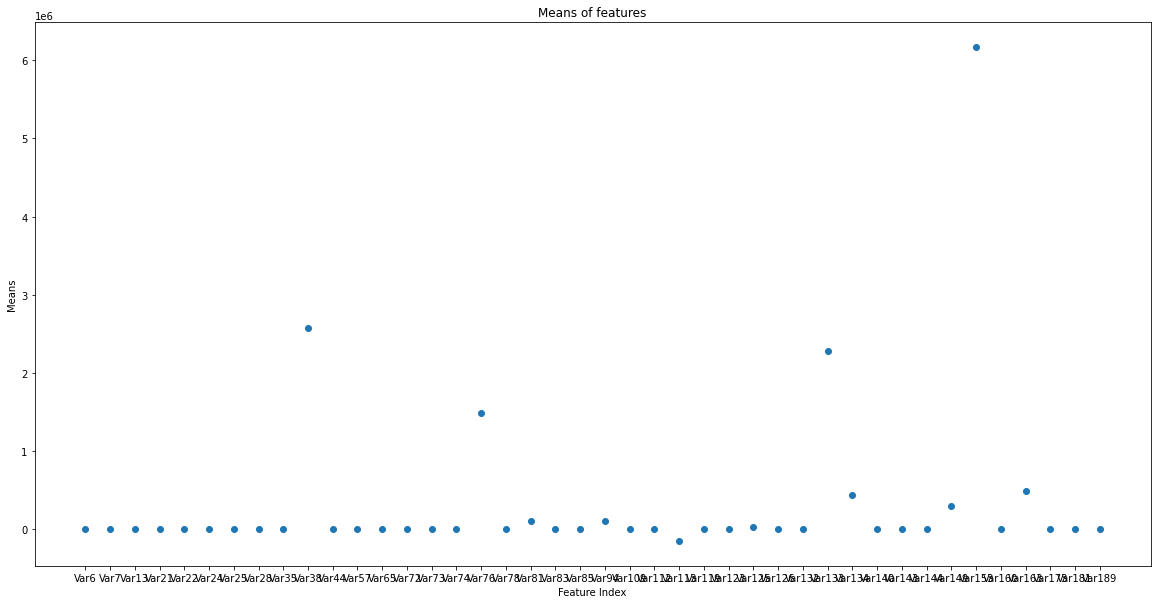

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(numerical_data.columns,means)
plt.title('Means of features')
plt.xlabel('Feature Index')
plt.ylabel('Means')
plt.show()

Observation:
- Most of means on scale are close to 0.
- Only 4 features have mean > 1 million

Let's try again by removing means > 1000000

In [ ]:
filter_means = means[means < 1000000]

In [ ]:
filter_means.shape

(38,)

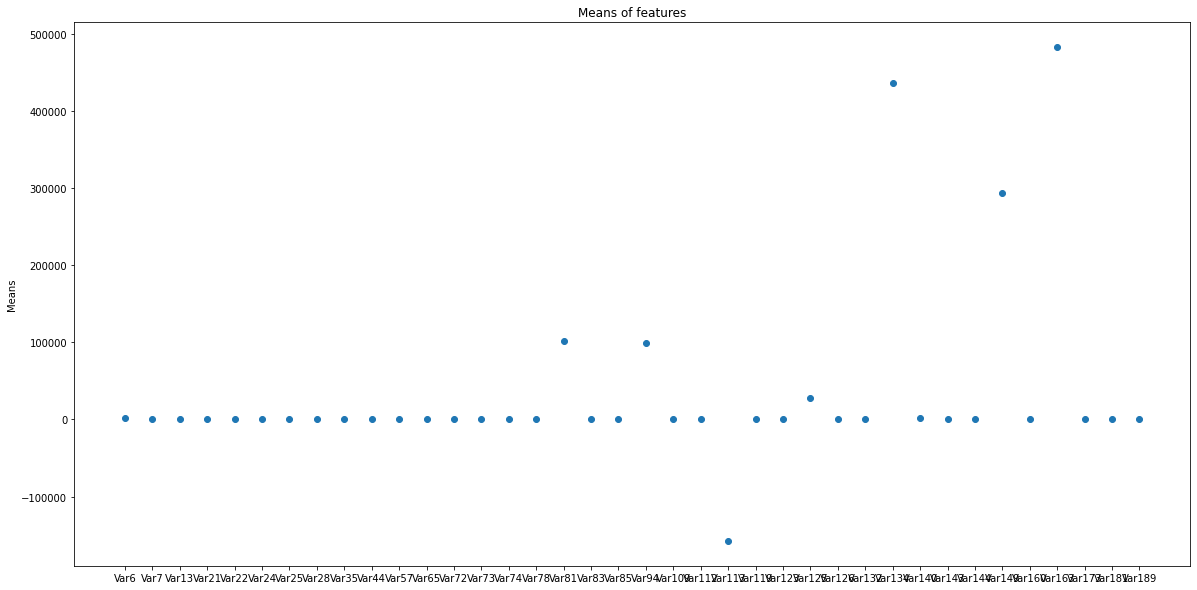

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(filter_means.index, filter_means)
plt.title('Means of features')
plt.ylabel('Means')
plt.show()

Observation:
- Out of 42 numerical features, 38 are under mean of 1 million
- Most of the means are concentrated in region < 1 mil and close to 0

Let's plot region under 10k

In [ ]:
filter_means = means[(means < 10000) & (means > 0)]

In [ ]:
filter_means.shape

(30,)

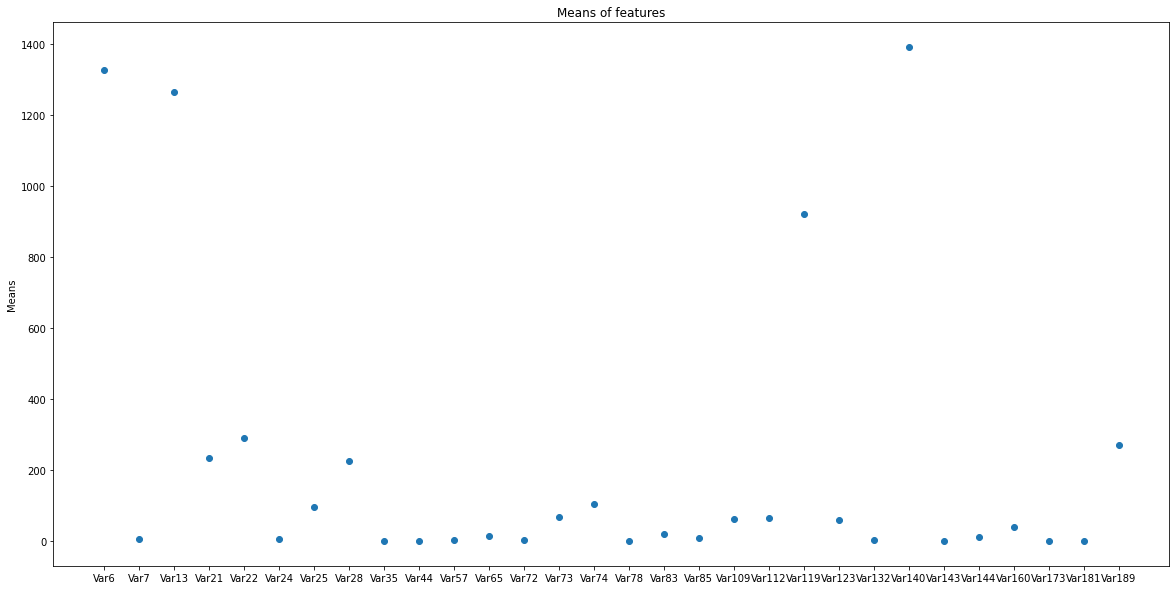

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(filter_means.index, filter_means)
plt.title('Means of features')
plt.ylabel('Means')
plt.show()

Observation:
- There are 30 points which lie under 10k.
- Most of the points are concentrated under 400

let's observation area under mean of 400

In [ ]:
filter_means = means[(means < 400) & (means > 0)]

In [ ]:
filter_means.shape

(26,)

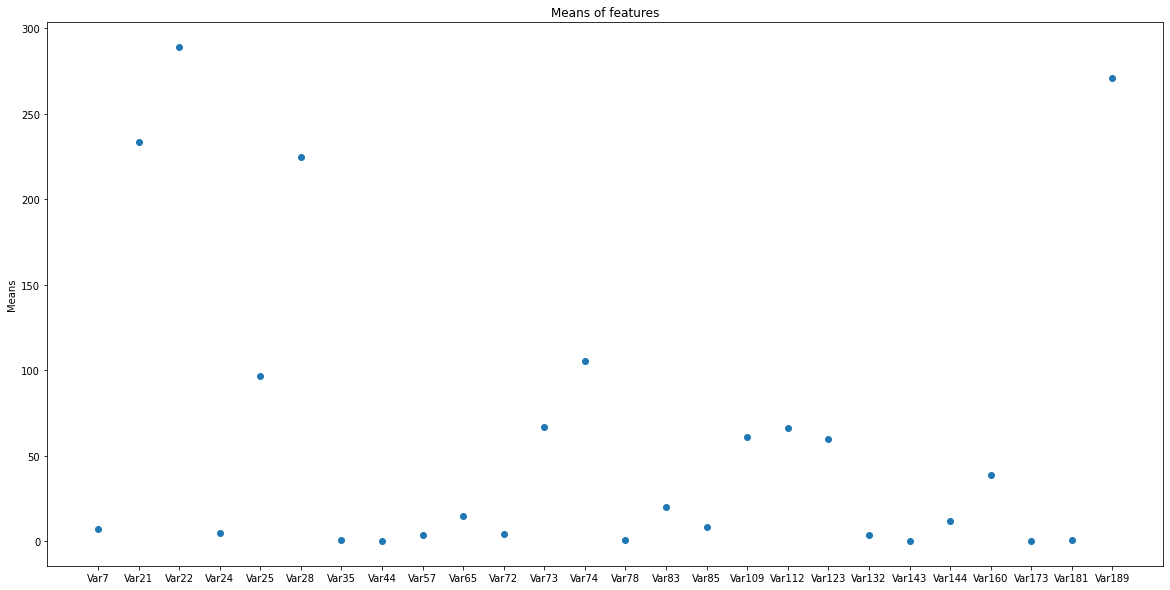

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(filter_means.index, filter_means)
plt.title('Means of features')
plt.ylabel('Means')
plt.show()

Observation:
- Most of the means are concentrated under 50.

In [ ]:
filter_means = means[(means < 50) & (means > 0)]

In [ ]:
filter_means.shape

(16,)

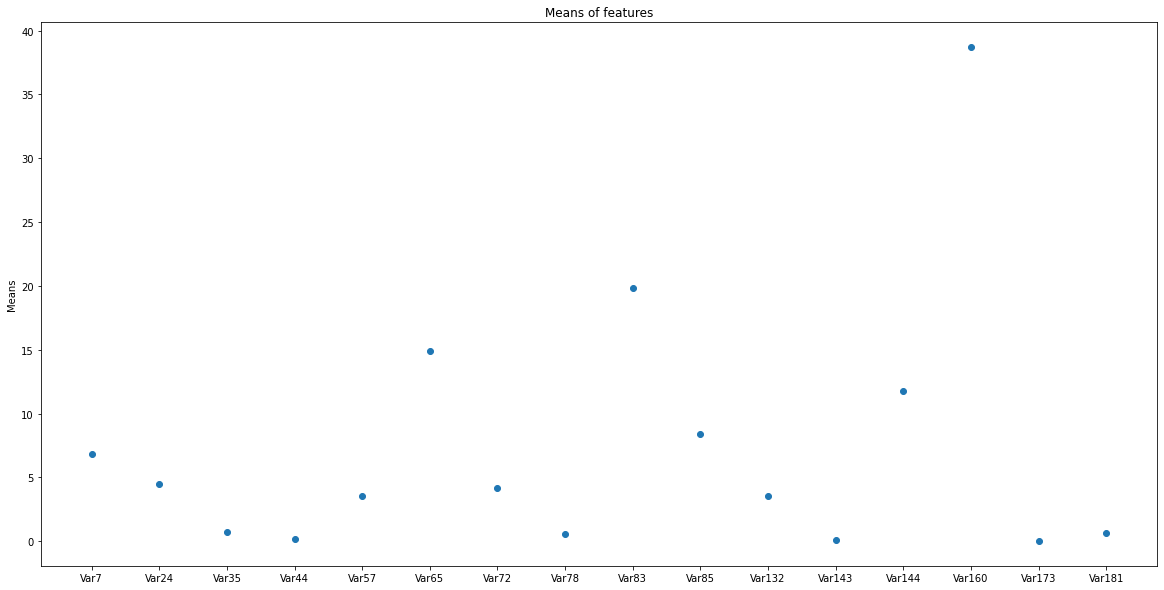

In [ ]:
plt.figure(figsize = (20, 10))
plt.scatter(filter_means.index, filter_means)
plt.title('Means of features')
plt.ylabel('Means')
plt.show()

Observation:
- Out of 42 numerical features, 26 have mean under 400.
- Out of 42 numerical features, 16 features have mean under 50.
- 14 of the features have mean under 20.

#### <font color= 'red'>Query: How does feature groups help us ?
    Insight could help you create new features. 

#### <font color = 'red'>Query: How does means help in identifying feature groups ?
    We can form a feature group for features having similar means and use that feature group to generate new features. for e.g: a a new feature which is average value of features having mean under 20.

##### We'll be making 2  new feature groups i.e
1. Features having means under 200 and greater than 0
2. Features having means under 20 and greater than 0

In [ ]:
means_test

Var6      1.328281e+03
Var7      6.781885e+00
Var13     1.192371e+03
Var21     2.380074e+02
Var22     2.946785e+02
Var24     4.530982e+00
Var25     9.736936e+01
Var28     2.231723e+02
Var35     7.119224e-01
Var38     2.609874e+06
Var44     1.697364e-01
Var57     3.511862e+00
Var65     1.474436e+01
Var72     4.163574e+00
Var73     6.612300e+01
Var74     9.667489e+01
Var76     1.497728e+06
Var78     5.283997e-01
Var81     1.057588e+05
Var83     2.062865e+01
Var85     8.636594e+00
Var94     9.823136e+04
Var109    6.126804e+01
Var112    6.661961e+01
Var113   -1.349349e+05
Var119    8.954002e+02
Var123    6.254108e+01
Var125    2.940204e+04
Var126   -6.170478e-01
Var132    3.517812e+00
Var133    2.261058e+06
Var134    4.399443e+05
Var140    1.344609e+03
Var143    6.882100e-02
Var144    1.147899e+01
Var149    3.006562e+05
Var153    6.217543e+06
Var160    3.913908e+01
Var163    4.956880e+05
Var173    7.940885e-03
Var181    6.083600e-01
Var189    2.681173e+02
dtype: float64

In [ ]:
feature_group_200 = means[(means < 200) & (means > 0)]

In [ ]:
feature_group_200 = list(feature_group_200.index)

In [ ]:
feature_group_50 = means[(means < 50) & (means > 0)]

In [ ]:
feature_group_50 = list(feature_group_50.index)

In [ ]:
with open('feature_group_200.pickle', 'wb') as handle:
    pickle.dump(feature_group_200, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('feature_group_50.pickle', 'wb') as handle:
    pickle.dump(feature_group_50, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
feature_group_50

['Var7',
 'Var24',
 'Var35',
 'Var44',
 'Var57',
 'Var65',
 'Var72',
 'Var78',
 'Var83',
 'Var85',
 'Var132',
 'Var143',
 'Var144',
 'Var160',
 'Var173',
 'Var181']

 <hr>
 
#### Clustering  of features



In [ ]:
#https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553
#https://towardsdatascience.com/clustering-datasets-having-both-numerical-and-categorical-variables-ed91cdca0677

In [ ]:
data_new.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
13282,3458.0,7.0,2528.0,596.0,745.0,10.0,272.0,186.64,0.0,25536.0,0.0,5.802820,18.0,3.0,214,7.0,187616.0,0.0,3434.82,15.0,20.0,217311.0,144.0,160.0,-38241.44,1480.0,60.0,15480.0,NaN,0.0,365835.0,48138.0,4830.0,0.0,18.0,25130.0,649576.0,144.0,221724.0,0.0,0.0,390.0,oUPBcmzkzH,5QKIjwyXr4MCZTEp7uAkS8PtBLcn,taul,1K8T,lK27,fhk21Ss,r83_sZi,Xuaegi4,kk_f,9_Y1,yrDU,VpdQ,y6dw,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,5u2Bxlj9ua90kqrA,44ysJIU,7WwtEtr,z5Ok,UYBR,qxDb,4UxGlow,JIiEFBU,catzS2D,jySVZNlOJy,xG3x,Qcbd,ZI9m,VjDE,mj86
44013,616.0,0.0,0.0,140.0,175.0,0.0,8.0,321.60,0.0,199926.0,0.0,5.040376,9.0,3.0,28,0.0,6220800.0,0.0,119798.70,0.0,0.0,35172.0,32.0,72.0,210249.60,565.0,6.0,0.0,NaN,0.0,9245550.0,16194.0,0.0,0.0,18.0,0.0,10672480.0,48.0,0.0,0.0,0.0,348.0,52Iq9ayE15,RO12,taul,1K8T,z32l,UsSOoyT,nQUq7hGe64,NaN,jrUy,9_Y1,vm5R,09_Q,IYzP,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,kZJtVhC,9eg8,UYBR,FzaX,_Pu6s0w,oslk,Ha_79_c,LM8l689qOp,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN
30999,777.0,14.0,428.0,120.0,150.0,4.0,88.0,186.64,0.0,0.0,0.0,5.946806,36.0,12.0,170,21.0,2764800.0,0.0,234931.50,0.0,8.0,388527.0,32.0,32.0,123881.20,480.0,0.0,34722.0,12.0,0.0,4634955.0,1900800.0,5530.0,0.0,27.0,1209600.0,10274360.0,22.0,2073600.0,0.0,0.0,NaN,a4vPe2fHUn,2Knk1KF,taul,1K8T,TyGl,THRJJYr,r83_sZi,Sc4mZtf,sOYL,9_Y1,mTeA,VpdQ,hAFG,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,ma2VgRD,_JdcICD,upnW,UYBR,FzaX,Nr9Y_02,oslk,afdTzYj,LM8l689qOp,kG3k,FSa2,RAYp,TCU50_Yjmm6GIBZ0lL_,mj86
7521,3416.0,7.0,124.0,536.0,670.0,20.0,192.0,213.36,0.0,1062.0,0.0,0.411237,9.0,3.0,34,35.0,237296.0,0.0,6929.43,0.0,54.0,4020.0,256.0,384.0,-1417852.00,1525.0,6.0,189.0,-26.0,0.0,262870.0,38430.0,150.0,0.0,9.0,78869.0,480408.0,68.0,110844.0,0.0,0.0,NaN,EsYq9aX0Db,RO12,taul,1K8T,L80O,8K14q6X,PaagavI,NaN,9n6A,9_Y1,Y9Bl,sJzTlal,IYzP,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,NaN,mAjbk_S,_fR4,cJvF,OFWH,HrlK5YS,oslk,fs3nhll,LM8l689qOp,NaN,uWr3,RAYp,F2FyR07IdsN7I,NaN
17794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.357830,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2951636.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,1YVvyx7IEC,RO12,taul,1K8T,FgS1,oKsWccX,Gai9lEF2Fr,NaN,lb2I,9_Y1,RcM7,09_Q,NaN,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,mAja5EA,WGwm,UYBR,FzaX,_Px1UQz,oslk,35dYyXX,LM8l689qOp,NaN,szEZ,RAYp,F2FyR07IdsN7I,NaN


In [ ]:
data_new_test.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
24242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.429609,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2242172.00,NaN,NaN,NaN,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zcRZptzip9,RO12,taul,1K8T,487l,kjvBmIU,_UtlxbJ,NaN,0xiW,9_Y1,t_4G,VpdQ,NaN,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,NaN,mAj3FSW,U56I,UYBR,FzaX,1vNmS85,oslk,MkQldxq,LM8l689qOp,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN
9248,1554.0,14.0,468.0,160.0,200.0,10.0,48.0,186.64,0.0,4002636.0,0.0,4.268105,18.0,6.0,152,14.0,2457712.0,0.0,81303.59,0.0,14.0,187728.0,80.0,32.0,-75197.20,950.0,72.0,2268.0,4.0,0.0,5222150.0,74150.0,1130.0,0.0,36.0,224035.0,8336480.0,22.0,169740.0,0.0,0.0,NaN,zcROj17IEC,2Knk1KF,taul,1K8T,aD1X,fhk21Ss,sLarhXg,z0C6Wov,vpM0,9_Y1,zfpA,VpdQ,wMei,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,E1aAZ0x7vd,omai8VY,CWNBi3w,S405,cJvF,FzaX,4UxGlow,QKW8DRm,catzS2D,LM8l689qOp,ELof,7aLG,ZI9m,ib5G6X1eUxUn6,mj86
16049,455.0,0.0,0.0,132.0,165.0,0.0,104.0,153.20,10.0,2356602.0,18.0,6.255074,9.0,3.0,26,0.0,1470024.0,3.0,219249.60,15.0,6.0,36375.0,40.0,32.0,16907.44,540.0,30.0,0.0,4.0,40.0,1778395.0,2068900.0,0.0,0.0,9.0,0.0,9712680.0,10.0,1555200.0,0.0,0.0,NaN,4e7gUH7IEC,RO12,taul,1K8T,vSNn,jCepSrJ,NW71mrodGH,NaN,BGAR,9_Y1,m_h1,VpdQ,zm5i,me75fM6ugJ,sBgB,uKAI,L84s,NhsEn4L,NaN,kZJtVhC,8JTE,UYBR,FzaX,Oy_RPEi,oslk,FS4qjNq,LM8l689qOp,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN
36719,812.0,7.0,3820.0,144.0,180.0,8.0,160.0,186.64,0.0,0.0,0.0,3.068148,9.0,3.0,152,1876.0,687296.0,3.0,173838.60,0.0,10.0,309.0,40.0,32.0,82540.40,570.0,0.0,46557.0,38.0,8.0,782385.0,543594.0,670.0,0.0,27.0,505988.0,2338564.0,14.0,422730.0,0.0,0.0,NaN,4e7Wq69R_D,2Knk1KF,taul,1K8T,ssAy,fhk21Ss,7ruKm4v,nDzuNGW,294_,9_Y1,Px52,VpdQ,itlM,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,Ie_5MZs,M_FmDrS,CWNY2py,PzVn,UYBR,FzaX,4UxGlow,zCkv,catzS2D,jySVZNlOJy,ELof,PM2D,ZI9m,TCU50_Yjmm6GIBZ0lL_,mj86
48490,721.0,7.0,1996.0,24.0,30.0,0.0,0.0,253.52,0.0,3441234.0,0.0,3.869259,9.0,NaN,106,91.0,0.0,0.0,242782.50,0.0,0.0,NaN,0.0,0.0,127975.60,390.0,6.0,37647.0,-18.0,0.0,10109000.0,0.0,515.0,0.0,36.0,0.0,10381360.0,10.0,0.0,0.0,0.0,300.0,GcUBcmz45j,2Knk1KF,taul,1K8T,0WHw,xziqMKD,aXPHXVS,trdQ74g,kTCl,9_Y1,KubS,09_Q,hAFG,me75fM6ugJ,kIsH,uKAI,Mtgm,XfqtO3UdzaXh_,K75UFCy,XTbPUYD,uonk,UYBR,FzaX,KX868SY,oslk,Mkb2C8o,LM8l689qOp,kG3k,Qcbd,RAYp,55YFVY9,NaN


Before we start off with clustering, we need to deal with NaN data. For numerical data, we'll perform mean imputation and for categorical data, we'll consider NaN as separate category.

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 13282 to 317
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    35500 non-null  float64
 1   Var7    35507 non-null  float64
 2   Var13   35507 non-null  float64
 3   Var21   35500 non-null  float64
 4   Var22   35924 non-null  float64
 5   Var24   34152 non-null  float64
 6   Var25   35924 non-null  float64
 7   Var28   35922 non-null  float64
 8   Var35   35924 non-null  float64
 9   Var38   35924 non-null  float64
 10  Var44   35924 non-null  float64
 11  Var57   40000 non-null  float64
 12  Var65   35507 non-null  float64
 13  Var72   22069 non-null  float64
 14  Var73   40000 non-null  int64  
 15  Var74   35507 non-null  float64
 16  Var76   35924 non-null  float64
 17  Var78   35924 non-null  float64
 18  Var81   35500 non-null  float64
 19  Var83   35924 non-null  float64
 20  Var85   35924 non-null  float64
 21  Var94   22069 non-null  float64
 

In [ ]:
data_new.mean()

Var6      1.325971e+03
Var7      6.816459e+00
Var13     1.264142e+03
Var21     2.336365e+02
Var22     2.891265e+02
Var24     4.502108e+00
Var25     9.669012e+01
Var28     2.248447e+02
Var35     7.180436e-01
Var38     2.571342e+06
Var44     1.661007e-01
Var57     3.512424e+00
Var65     1.490030e+01
Var72     4.197472e+00
Var73     6.677060e+01
Var74     1.054191e+02
Var76     1.488242e+06
Var78     5.362989e-01
Var81     1.024081e+05
Var83     1.987084e+01
Var85     8.416713e+00
Var94     9.878167e+04
Var109    6.079293e+01
Var112    6.612048e+01
Var113   -1.578645e+05
Var119    9.213462e+02
Var123    5.959414e+01
Var125    2.750573e+04
Var126   -5.380911e-01
Var132    3.526333e+00
Var133    2.276730e+06
Var134    4.366832e+05
Var140    1.390502e+03
Var143    5.528338e-02
Var144    1.179051e+01
Var149    2.934735e+05
Var153    6.172988e+06
Var160    3.871818e+01
Var163    4.836524e+05
Var173    6.569424e-03
Var181    6.122369e-01
Var189    2.706468e+02
dtype: float64

In [ ]:
data_impute = data_new.iloc[:,0:42].fillna(data_new.mean())

In [ ]:
data_impute_test = data_new_test.iloc[:,0:42].fillna(data_new_test.mean())

In [ ]:
data_new_imputed = pd.concat([data_impute, data_new.iloc[:,42:].fillna('Others')], axis =1)

In [ ]:
data_new_imputed_test = pd.concat([data_impute_test, data_new_test.iloc[:,42:].fillna('Others')], axis =1)

In [ ]:
data_new_imputed.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
13282,3458.000000,7.000000,2528.000000,596.000000,745.000000,10.000000,272.000000,186.640000,0.000000,2.553600e+04,0.000000,5.802820,18.000000,3.000000,214,7.000000,1.876160e+05,0.000000,3434.820000,15.000000,20.000000,217311.000000,144.000000,160.000000,-38241.44,1480.000000,60.000000,15480.000000,-0.538091,0.000000,3.658350e+05,4.813800e+04,4830.000000,0.000000,18.000000,2.513000e+04,6.495760e+05,144.000000,2.217240e+05,0.000000,0.000000,390.000000,oUPBcmzkzH,5QKIjwyXr4MCZTEp7uAkS8PtBLcn,taul,1K8T,lK27,fhk21Ss,r83_sZi,Xuaegi4,kk_f,9_Y1,yrDU,VpdQ,y6dw,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,5u2Bxlj9ua90kqrA,44ysJIU,7WwtEtr,z5Ok,UYBR,qxDb,4UxGlow,JIiEFBU,catzS2D,jySVZNlOJy,xG3x,Qcbd,ZI9m,VjDE,mj86
44013,616.000000,0.000000,0.000000,140.000000,175.000000,0.000000,8.000000,321.600000,0.000000,1.999260e+05,0.000000,5.040376,9.000000,3.000000,28,0.000000,6.220800e+06,0.000000,119798.700000,0.000000,0.000000,35172.000000,32.000000,72.000000,210249.60,565.000000,6.000000,0.000000,-0.538091,0.000000,9.245550e+06,1.619400e+04,0.000000,0.000000,18.000000,0.000000e+00,1.067248e+07,48.000000,0.000000e+00,0.000000,0.000000,348.000000,52Iq9ayE15,RO12,taul,1K8T,z32l,UsSOoyT,nQUq7hGe64,Others,jrUy,9_Y1,vm5R,09_Q,IYzP,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,Others,kZJtVhC,9eg8,UYBR,FzaX,_Pu6s0w,oslk,Ha_79_c,LM8l689qOp,Others,7P5s,RAYp,F2FyR07IdsN7I,Others
30999,777.000000,14.000000,428.000000,120.000000,150.000000,4.000000,88.000000,186.640000,0.000000,0.000000e+00,0.000000,5.946806,36.000000,12.000000,170,21.000000,2.764800e+06,0.000000,234931.500000,0.000000,8.000000,388527.000000,32.000000,32.000000,123881.20,480.000000,0.000000,34722.000000,12.000000,0.000000,4.634955e+06,1.900800e+06,5530.000000,0.000000,27.000000,1.209600e+06,1.027436e+07,22.000000,2.073600e+06,0.000000,0.000000,270.646779,a4vPe2fHUn,2Knk1KF,taul,1K8T,TyGl,THRJJYr,r83_sZi,Sc4mZtf,sOYL,9_Y1,mTeA,VpdQ,hAFG,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,ma2VgRD,_JdcICD,upnW,UYBR,FzaX,Nr9Y_02,oslk,afdTzYj,LM8l689qOp,kG3k,FSa2,RAYp,TCU50_Yjmm6GIBZ0lL_,mj86
7521,3416.000000,7.000000,124.000000,536.000000,670.000000,20.000000,192.000000,213.360000,0.000000,1.062000e+03,0.000000,0.411237,9.000000,3.000000,34,35.000000,2.372960e+05,0.000000,6929.430000,0.000000,54.000000,4020.000000,256.000000,384.000000,-1417852.00,1525.000000,6.000000,189.000000,-26.000000,0.000000,2.628700e+05,3.843000e+04,150.000000,0.000000,9.000000,7.886900e+04,4.804080e+05,68.000000,1.108440e+05,0.000000,0.000000,270.646779,EsYq9aX0Db,RO12,taul,1K8T,L80O,8K14q6X,PaagavI,Others,9n6A,9_Y1,Y9Bl,sJzTlal,IYzP,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,Others,mAjbk_S,_fR4,cJvF,OFWH,HrlK5YS,oslk,fs3nhll,LM8l689qOp,Others,uWr3,RAYp,F2FyR07IdsN7I,Others
17794,1325.971155,6.816459,1264.142394,233.636507,289.126489,4.502108,96.690124,224.844725,0.718044,2.571342e+06,0.166101,3.357830,14.900301,4.197472,4,105.419129,1.488242e+06,0.536299,102408.133882,19.870838,8.416713,98781.665957,60.792926,66.120477,-2951636.00,921.346197,59.594143,27505.726139,-0.538091,3.526333,2.276730e+06,4.366832e+05,1390.502014,0.055283,11.790507,2.934735e+05,6.172988e+06,38.718183,4.836524e+05,0.006569,0.612237,252.000000,1YVvyx7IEC,RO12,taul,1K8T,FgS1,oKsWccX,Gai9lEF2Fr,Others,lb2I,9_Y1,RcM7,09_Q,Others,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,Others,mAja5EA,WGwm,UYBR,FzaX,_Px1UQz,oslk,35dYyXX,LM8l689qOp,Others,szEZ,RAYp,F2FyR07IdsN7I,Others


In [ ]:
data_new_imputed_test.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
24242,1328.281017,6.781885,1192.371231,238.007357,294.678504,4.530982,97.369361,223.17231,0.711922,2.609874e+06,0.169736,1.429609,14.74436,4.163574,6,96.674894,1.497728e+06,0.5284,105758.795508,20.628653,8.636594,98231.355251,61.268044,66.61961,-2242172.00,895.400178,62.541083,29402.042104,-18.0,3.517812,2.261058e+06,4.399443e+05,1344.609113,0.068821,11.478988,300656.15282,6.217543e+06,39.139076,4.956880e+05,0.007941,0.60836,268.11731,zcRZptzip9,RO12,taul,1K8T,487l,kjvBmIU,_UtlxbJ,Others,0xiW,9_Y1,t_4G,VpdQ,Others,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,Others,mAj3FSW,U56I,UYBR,FzaX,1vNmS85,oslk,MkQldxq,LM8l689qOp,Others,Qu4f,RAYp,F2FyR07IdsN7I,Others
9248,1554.000000,14.000000,468.000000,160.000000,200.000000,10.000000,48.000000,186.64000,0.000000,4.002636e+06,0.000000,4.268105,18.00000,6.000000,152,14.000000,2.457712e+06,0.0000,81303.590000,0.000000,14.000000,187728.000000,80.000000,32.00000,-75197.20,950.000000,72.000000,2268.000000,4.0,0.000000,5.222150e+06,7.415000e+04,1130.000000,0.000000,36.000000,224035.00000,8.336480e+06,22.000000,1.697400e+05,0.000000,0.00000,268.11731,zcROj17IEC,2Knk1KF,taul,1K8T,aD1X,fhk21Ss,sLarhXg,z0C6Wov,vpM0,9_Y1,zfpA,VpdQ,wMei,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,E1aAZ0x7vd,omai8VY,CWNBi3w,S405,cJvF,FzaX,4UxGlow,QKW8DRm,catzS2D,LM8l689qOp,ELof,7aLG,ZI9m,ib5G6X1eUxUn6,mj86
16049,455.000000,0.000000,0.000000,132.000000,165.000000,0.000000,104.000000,153.20000,10.000000,2.356602e+06,18.000000,6.255074,9.00000,3.000000,26,0.000000,1.470024e+06,3.0000,219249.600000,15.000000,6.000000,36375.000000,40.000000,32.00000,16907.44,540.000000,30.000000,0.000000,4.0,40.000000,1.778395e+06,2.068900e+06,0.000000,0.000000,9.000000,0.00000,9.712680e+06,10.000000,1.555200e+06,0.000000,0.00000,268.11731,4e7gUH7IEC,RO12,taul,1K8T,vSNn,jCepSrJ,NW71mrodGH,Others,BGAR,9_Y1,m_h1,VpdQ,zm5i,me75fM6ugJ,sBgB,uKAI,L84s,NhsEn4L,Others,kZJtVhC,8JTE,UYBR,FzaX,Oy_RPEi,oslk,FS4qjNq,LM8l689qOp,Others,WqMG,RAYp,F2FyR07IdsN7I,Others
36719,812.000000,7.000000,3820.000000,144.000000,180.000000,8.000000,160.000000,186.64000,0.000000,0.000000e+00,0.000000,3.068148,9.00000,3.000000,152,1876.000000,6.872960e+05,3.0000,173838.600000,0.000000,10.000000,309.000000,40.000000,32.00000,82540.40,570.000000,0.000000,46557.000000,38.0,8.000000,7.823850e+05,5.435940e+05,670.000000,0.000000,27.000000,505988.00000,2.338564e+06,14.000000,4.227300e+05,0.000000,0.00000,268.11731,4e7Wq69R_D,2Knk1KF,taul,1K8T,ssAy,fhk21Ss,7ruKm4v,nDzuNGW,294_,9_Y1,Px52,VpdQ,itlM,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,Ie_5MZs,M_FmDrS,CWNY2py,PzVn,UYBR,FzaX,4UxGlow,zCkv,catzS2D,jySVZNlOJy,ELof,PM2D,ZI9m,TCU50_Yjmm6GIBZ0lL_,mj86
48490,721.000000,7.000000,1996.000000,24.000000,30.000000,0.000000,0.000000,253.52000,0.000000,3.441234e+06,0.000000,3.869259,9.00000,4.163574,106,91.000000,0.000000e+00,0.0000,242782.500000,0.000000,0.000000,98231.355251,0.000000,0.00000,127975.60,390.000000,6.000000,37647.000000,-18.0,0.000000,1.010900e+07,0.000000e+00,515.000000,0.000000,36.000000,0.00000,1.038136e+07,10.000000,0.000000e+00,0.000000,0.00000,300.00000,GcUBcmz45j,2Knk1KF,taul,1K8T,0WHw,xziqMKD,aXPHXVS,trdQ74g,kTCl,9_Y1,KubS,09_Q,hAFG,me75fM6ugJ,kIsH,uKAI,Mtgm,XfqtO3UdzaXh_,K75UFCy,XTbPUYD,uonk,UYBR,FzaX,KX868SY,oslk,Mkb2C8o,LM8l689qOp,kG3k,Qcbd,RAYp,55YFVY9,Others


Since our data contain both categorical and numerical features, we'll first convert our Categorical Data to numerical using ordinal encoding.


In [ ]:
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)

In [ ]:
data_new_imputed.iloc[:, 42:].head()

,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
13282,oUPBcmzkzH,5QKIjwyXr4MCZTEp7uAkS8PtBLcn,taul,1K8T,lK27,fhk21Ss,r83_sZi,Xuaegi4,kk_f,9_Y1,yrDU,VpdQ,y6dw,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,5u2Bxlj9ua90kqrA,44ysJIU,7WwtEtr,z5Ok,UYBR,qxDb,4UxGlow,JIiEFBU,catzS2D,jySVZNlOJy,xG3x,Qcbd,ZI9m,VjDE,mj86
44013,52Iq9ayE15,RO12,taul,1K8T,z32l,UsSOoyT,nQUq7hGe64,Others,jrUy,9_Y1,vm5R,09_Q,IYzP,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,Others,kZJtVhC,9eg8,UYBR,FzaX,_Pu6s0w,oslk,Ha_79_c,LM8l689qOp,Others,7P5s,RAYp,F2FyR07IdsN7I,Others
30999,a4vPe2fHUn,2Knk1KF,taul,1K8T,TyGl,THRJJYr,r83_sZi,Sc4mZtf,sOYL,9_Y1,mTeA,VpdQ,hAFG,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,ma2VgRD,_JdcICD,upnW,UYBR,FzaX,Nr9Y_02,oslk,afdTzYj,LM8l689qOp,kG3k,FSa2,RAYp,TCU50_Yjmm6GIBZ0lL_,mj86
7521,EsYq9aX0Db,RO12,taul,1K8T,L80O,8K14q6X,PaagavI,Others,9n6A,9_Y1,Y9Bl,sJzTlal,IYzP,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,Others,mAjbk_S,_fR4,cJvF,OFWH,HrlK5YS,oslk,fs3nhll,LM8l689qOp,Others,uWr3,RAYp,F2FyR07IdsN7I,Others
17794,1YVvyx7IEC,RO12,taul,1K8T,FgS1,oKsWccX,Gai9lEF2Fr,Others,lb2I,9_Y1,RcM7,09_Q,Others,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,Others,mAja5EA,WGwm,UYBR,FzaX,_Px1UQz,oslk,35dYyXX,LM8l689qOp,Others,szEZ,RAYp,F2FyR07IdsN7I,Others


In [ ]:
encoder.fit(data_new_imputed.iloc[:,42:])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [ ]:
ordinal_features = encoder.transform(data_new_imputed.iloc[:,42:])

In [ ]:
ordinal_features_test = encoder.transform(data_new_imputed_test.iloc[:,42:])

In [ ]:
ordinal_features.shape

(40000, 32)

In [ ]:
ordinal_features_test.shape

(10000, 32)

In [ ]:
numerical_features = data_new_imputed.iloc[:,0:42].values
numerical_features_test = data_new_imputed_test.iloc[:,0:42].values

In [ ]:
numerical_features.shape

(40000, 42)

In [ ]:
numerical_features_test.shape

(10000, 42)

In [ ]:
final_features = np.hstack((numerical_features, ordinal_features))

In [ ]:
final_features.shape

(40000, 74)

In [ ]:
final_features_test = np.hstack((numerical_features_test, ordinal_features_test))

In [ ]:
final_features_test.shape

(10000, 74)

#### Clustering of points

Reference: https://towardsdatascience.com/how-to-create-new-features-using-clustering-4ae772387290

In [ ]:
train_labels = []
test_labels = []
for i in range(2,7):
    kmeans = KMeans(n_clusters=i, n_jobs = -1)
    kmeans.fit(final_features)
    train_labels.append(kmeans.labels_)
    test_labels.append(kmeans.predict(final_features_test))

In [ ]:
# embedded_features = TSNE(n_jobs = -1).fit_transform(final_features)

In [ ]:
# for i in range(5):
#     plt.figure(figsize = (20,20))
#     plt.scatter(embedded_features[:,0], embedded_features[:,1], c= labels[i])
#     plt.title('Clustering of Features. Number of cluster: {}'.format(i+2))
#     plt.show()

Observation:
- The above plot shows the datapoints divided in 2,3,4,5 and 6 cluster.

We will use this cluster label as new feature.

##### <font color = 'red'> Query: How does clustering help in feature group? 
you can assign cluster numbers to similar features (groups) to create a new feature. Some more areas can also be explored.

<hr>

#### Finding Duplicate features

In [ ]:
#https://towardsdatascience.com/the-fastml-guide-9ada1bb761cf
duplicate_features = get_duplicate_features(data_new)

In [ ]:
duplicate_features.head()

,Desc,feature1,feature2
0,Duplicate Index,Var198,Var220
1,Duplicate Index,Var198,Var222
2,Duplicate Index,Var220,Var222


From the Description, we can see that although the values of two features are different but they occur at same index. Let's print them and see.

In [ ]:
data_new[data_new.Var198 == 'NldASpP'][['Var198','Var220','Var222']]

,Var198,Var220,Var222
49432,NldASpP,JFM1BiF,NKv4yOc
16700,NldASpP,JFM1BiF,NKv4yOc
40811,NldASpP,JFM1BiF,NKv4yOc
40771,NldASpP,JFM1BiF,NKv4yOc
17269,NldASpP,JFM1BiF,NKv4yOc
26141,NldASpP,JFM1BiF,NKv4yOc
36377,NldASpP,JFM1BiF,NKv4yOc
21746,NldASpP,JFM1BiF,NKv4yOc
17160,NldASpP,JFM1BiF,NKv4yOc
18954,NldASpP,JFM1BiF,NKv4yOc


In [ ]:
data_new[data_new.Var198 == 'ka_ns41'][['Var198','Var220','Var222']]

,Var198,Var220,Var222
34887,ka_ns41,1YVfGrO,fXVEsaq
20728,ka_ns41,1YVfGrO,fXVEsaq
45121,ka_ns41,1YVfGrO,fXVEsaq
36299,ka_ns41,1YVfGrO,fXVEsaq
18081,ka_ns41,1YVfGrO,fXVEsaq
...,...,...,...
20152,ka_ns41,1YVfGrO,fXVEsaq
32893,ka_ns41,1YVfGrO,fXVEsaq
45894,ka_ns41,1YVfGrO,fXVEsaq
46387,ka_ns41,1YVfGrO,fXVEsaq


##### Observation:
- Although we didn't find any duplicate features but there are 3 features for which value are different but they have same mapping.
- For ex: For column Var198, value 'ka_ns41' always occur with '1YVfGrO' (Var220) and 'fXVEsaq' (Var222)

#### <font color = 'red'> Query: Do we remove features with values having same mapping. If so, why?
The duplicate columns could be dropped
Because they are the same things

#### Dropping Var220 and Var222

In [ ]:
data_new = data_new.drop(['Var220','Var222'], axis = 1)

In [ ]:
data_new.shape

(40000, 72)

In [ ]:
X_test_churn =  X_test_churn.drop(['Var220','Var222'], axis = 1)

In [ ]:
X_test_churn.shape

(10000, 72)

2 columns have been dropped from dataset. We're left with 72 features now instead of 74

### Saving data in pickle file

In [ ]:
with open('X_train_churn.pickle', 'wb') as handle:
    pickle.dump(data_new, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('y_train_churn.pickle', 'wb') as handle:
    pickle.dump(y_train_churn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('X_test_churn.pickle', 'wb') as handle:
    pickle.dump(X_test_churn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('y_test_churn.pickle', 'wb') as handle:
    pickle.dump(y_test_churn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('train_labels.pickle', 'wb') as handle:
    pickle.dump(train_labels, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('test_labels.pickle', 'wb') as handle:
    pickle.dump(test_labels, handle, protocol=pickle.HIGHEST_PROTOCOL)